Import Essential Libraries

In [2]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree

sb.set()

In [3]:
df1 = pd.read_csv('lego-returns-kaggle.csv')
df1.head()

,set_id,set_name,release_year,theme_id,num_parts,num_figs,retail_price,num_unique_figs,set_rating,retire_month,retire_price,pop_price,Unnamed: 12
0,60244-1,Police Helicopter Transport,2020,61,317,4,39.99,3,4.6,Oct-21,37.60,37.29,NaN
1,60248-1,Fire Helicopter Response,2020,58,93,3,17.99,0,4.4,Nov-21,22.74,22.49,NaN
2,60252-1,Construction Bulldozer,2020,56,126,2,17.99,0,4.5,Nov-21,21.00,19.74,NaN
3,60254-1,Race Boat Transporter,2020,52,239,2,24.99,0,4.6,Nov-21,32.19,35.27,NaN
4,60258-1,Tuning Workshop,2020,52,897,7,89.99,6,4.6,Nov-21,86.17,95.37,NaN


In [4]:
df2 = pd.read_csv('sets.csv')
df2.head()

,Set_ID,Name,Year,Theme,Theme_Group,Subtheme,Category,Packaging,Num_Instructions,Availability,Pieces,Minifigures,Owned,Rating,USD_MSRP,Total_Quantity,Current_Price
0,75-1,PreSchool Set,1975,PreSchool,Pre-school,NaN,Normal,{Not specified},0,{Not specified},16.0,NaN,10.0,0.0,NaN,NaN,NaN
1,77-1,PreSchool Set,1975,PreSchool,Pre-school,NaN,Normal,{Not specified},0,{Not specified},20.0,NaN,11.0,0.0,NaN,NaN,NaN
2,077-1,Pre-School Set,1975,Duplo,Pre-school,NaN,Normal,{Not specified},0,{Not specified},21.0,NaN,10.0,0.0,NaN,0.0,NaN
3,78-1,PreSchool Set,1975,PreSchool,Pre-school,NaN,Normal,{Not specified},0,{Not specified},32.0,NaN,8.0,0.0,NaN,NaN,NaN
4,78-3,Basic Set,1975,Samsonite,Vintage,Basic set,Normal,Box,0,{Not specified},330.0,NaN,10.0,0.0,NaN,0.0,NaN


In [5]:
df2.rename(columns={'Set_ID':'set_id'}, inplace = True)

# Merge datasets on 'set_id'
merged_df = df1.merge(df2, on='set_id')

# Optionally, perform any additional data cleaning or preprocessing steps here

# Save merged dataset
merged_df.to_csv("merged_lego_dataset.csv", index=False)

# Display the first few rows of the merged dataset
merged_df.head()

,set_id,set_name,release_year,theme_id,num_parts,num_figs,retail_price,num_unique_figs,set_rating,retire_month,...,Packaging,Num_Instructions,Availability,Pieces,Minifigures,Owned,Rating,USD_MSRP,Total_Quantity,Current_Price
0,60244-1,Police Helicopter Transport,2020,61,317,4,39.99,3,4.6,Oct-21,...,Box,6,Retail,317.0,4.0,925.0,0.0,49.99,4.0,19.8000
1,60248-1,Fire Helicopter Response,2020,58,93,3,17.99,0,4.4,Nov-21,...,Box,2,Retail,93.0,3.0,1137.0,2.3,29.99,1.0,9.9900
2,60252-1,Construction Bulldozer,2020,56,126,2,17.99,0,4.5,Nov-21,...,Box,4,Retail,126.0,2.0,2606.0,3.8,19.99,9.0,18.5000
3,60254-1,Race Boat Transporter,2020,52,239,2,24.99,0,4.6,Nov-21,...,Box,4,Retail,238.0,2.0,2245.0,4.0,29.99,2.0,28.0000
4,60258-1,Tuning Workshop,2020,52,897,7,89.99,6,4.6,Nov-21,...,Box,12,Retail,897.0,7.0,3111.0,4.1,99.99,11.0,73.4902


Import "merged_lego_dataset.csv"

In [6]:
legoData = pd.read_csv("merged_lego_dataset.csv")
#Merged 2 datasets and extracted the set_ids found in both sets into a merged dataset
legoData.head()

,set_id,set_name,release_year,theme_id,num_parts,num_figs,retail_price,num_unique_figs,set_rating,retire_month,...,Packaging,Num_Instructions,Availability,Pieces,Minifigures,Owned,Rating,USD_MSRP,Total_Quantity,Current_Price
0,60244-1,Police Helicopter Transport,2020,61,317,4,39.99,3,4.6,Oct-21,...,Box,6,Retail,317.0,4.0,925.0,0.0,49.99,4.0,19.8000
1,60248-1,Fire Helicopter Response,2020,58,93,3,17.99,0,4.4,Nov-21,...,Box,2,Retail,93.0,3.0,1137.0,2.3,29.99,1.0,9.9900
2,60252-1,Construction Bulldozer,2020,56,126,2,17.99,0,4.5,Nov-21,...,Box,4,Retail,126.0,2.0,2606.0,3.8,19.99,9.0,18.5000
3,60254-1,Race Boat Transporter,2020,52,239,2,24.99,0,4.6,Nov-21,...,Box,4,Retail,238.0,2.0,2245.0,4.0,29.99,2.0,28.0000
4,60258-1,Tuning Workshop,2020,52,897,7,89.99,6,4.6,Nov-21,...,Box,12,Retail,897.0,7.0,3111.0,4.1,99.99,11.0,73.4902


In [7]:
# Add a new column 'price_change' which is the difference between 'price_change' and 'retail_price'
legoData['price_change'] = legoData['pop_price'] - legoData['retail_price']
legoData.head()

,set_id,set_name,release_year,theme_id,num_parts,num_figs,retail_price,num_unique_figs,set_rating,retire_month,...,Num_Instructions,Availability,Pieces,Minifigures,Owned,Rating,USD_MSRP,Total_Quantity,Current_Price,price_change
0,60244-1,Police Helicopter Transport,2020,61,317,4,39.99,3,4.6,Oct-21,...,6,Retail,317.0,4.0,925.0,0.0,49.99,4.0,19.8000,-2.70
1,60248-1,Fire Helicopter Response,2020,58,93,3,17.99,0,4.4,Nov-21,...,2,Retail,93.0,3.0,1137.0,2.3,29.99,1.0,9.9900,4.50
2,60252-1,Construction Bulldozer,2020,56,126,2,17.99,0,4.5,Nov-21,...,4,Retail,126.0,2.0,2606.0,3.8,19.99,9.0,18.5000,1.75
3,60254-1,Race Boat Transporter,2020,52,239,2,24.99,0,4.6,Nov-21,...,4,Retail,238.0,2.0,2245.0,4.0,29.99,2.0,28.0000,10.28
4,60258-1,Tuning Workshop,2020,52,897,7,89.99,6,4.6,Nov-21,...,12,Retail,897.0,7.0,3111.0,4.1,99.99,11.0,73.4902,5.38


Extracting numerical predictors from dataset

In [8]:
#Exploratory Data Analysis
#Let us start by exploring the response variable price_change, the one we are supposed to predict at the end of the day.

<Axes: xlabel='price_change', ylabel='Count'>

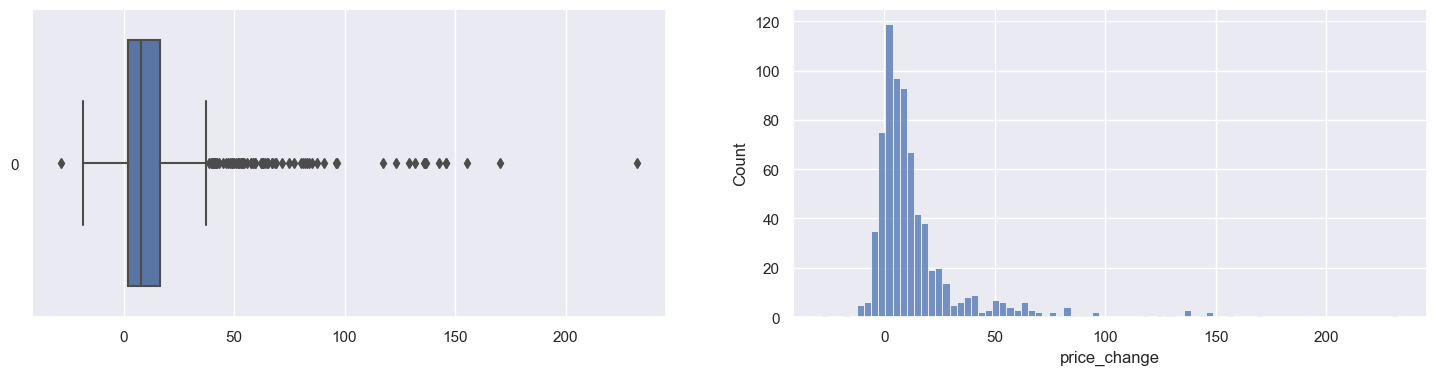

In [9]:
f, axes = plt.subplots(1, 2, figsize=(18, 4))
sb.boxplot(data = legoData['price_change'], orient = "h", ax = axes[0])
sb.histplot(data = legoData['price_change'], ax = axes[1])

In [10]:
#check out the Numeric predictors

In [11]:
numericalData = legoData[['num_parts','num_figs','retail_price','num_unique_figs']]
numericalData

,num_parts,num_figs,retail_price,num_unique_figs
0,317,4,39.99,3
1,93,3,17.99,0
2,126,2,17.99,0
3,239,2,24.99,0
4,897,7,89.99,6
...,...,...,...,...
717,310,4,34.99,1
718,363,2,34.99,1
719,282,10,24.99,4
720,558,4,49.99,3


In [12]:
numericalData.describe()

,num_parts,num_figs,retail_price,num_unique_figs
count,722.000000,722.00000,722.000000,722.000000
mean,517.495845,2.66759,46.499363,1.529086
std,615.932545,2.84608,44.507298,2.149054
min,52.000000,0.00000,10.990000,0.000000
25%,191.000000,0.00000,19.990000,0.000000
50%,333.000000,2.00000,29.990000,1.000000
75%,602.750000,4.00000,54.990000,2.000000
max,5923.000000,21.00000,399.990000,16.000000


Summary Statistics for Numerical Variables

Summary Statistics for price_change

In [13]:
def summary_stats_vis(var):
    var_df = pd.DataFrame(legoData[var])
    f = plt.figure(figsize = (24,4))
    sb.boxplot(data = var_df, orient = "h")
    f = plt.figure(figsize = (16,8))
    sb.histplot(data = var_df, kde = True)

Visualisation of summary statistics for numerical data

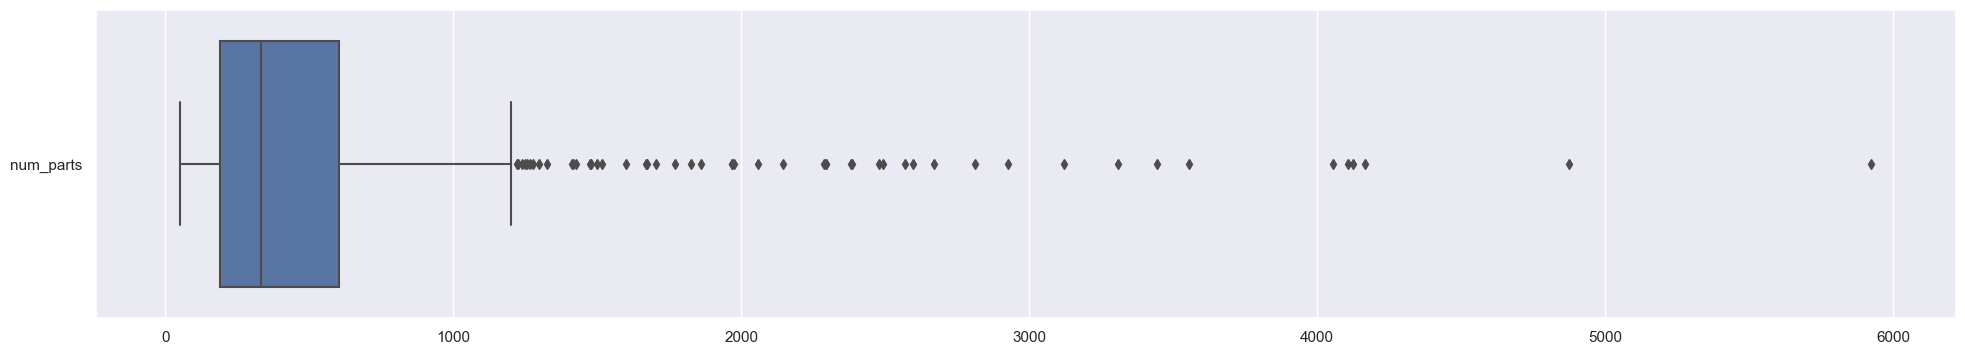

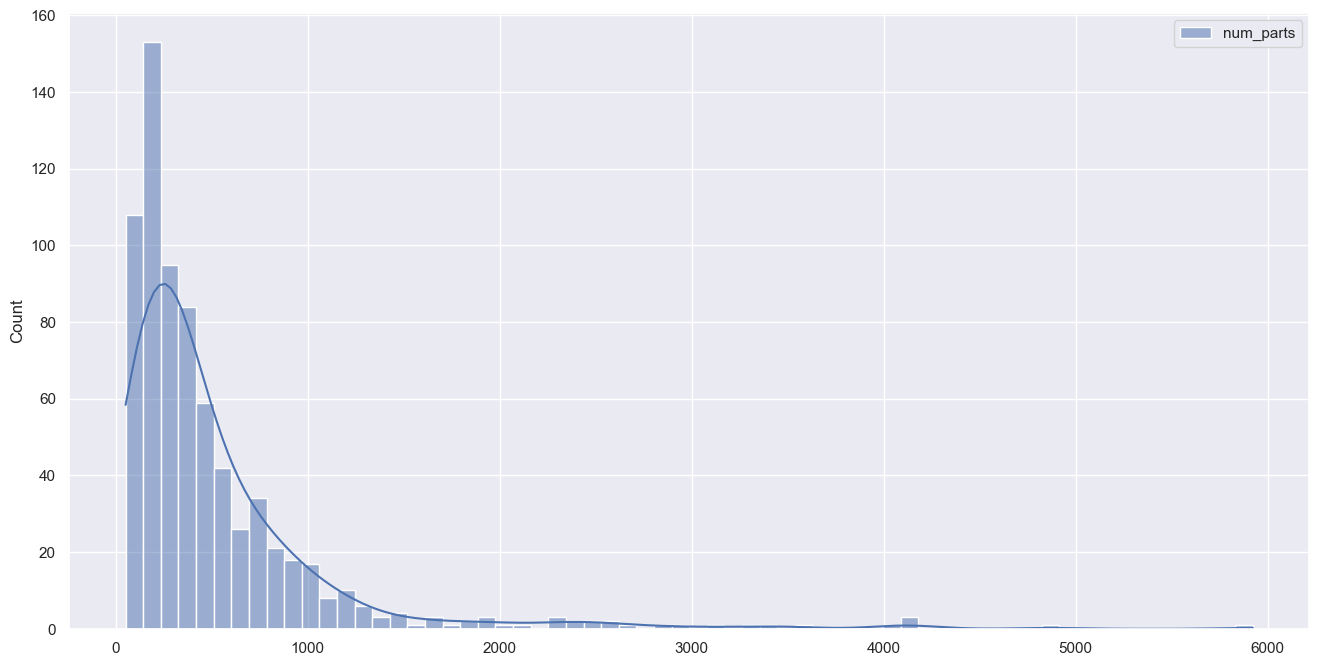

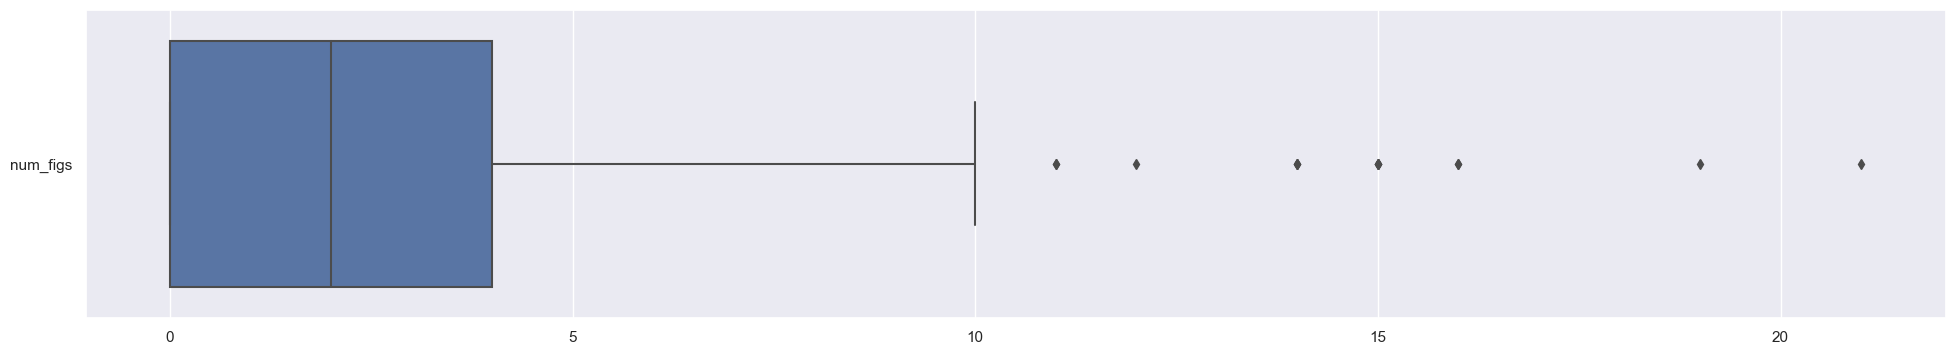

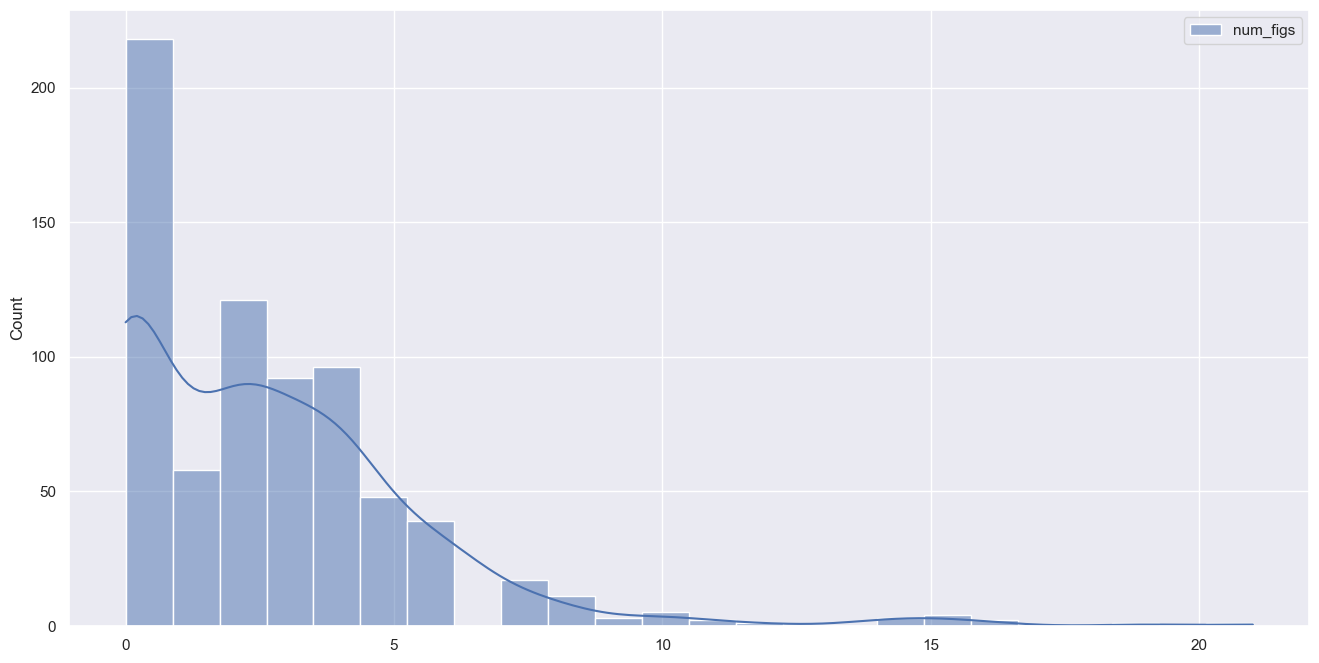

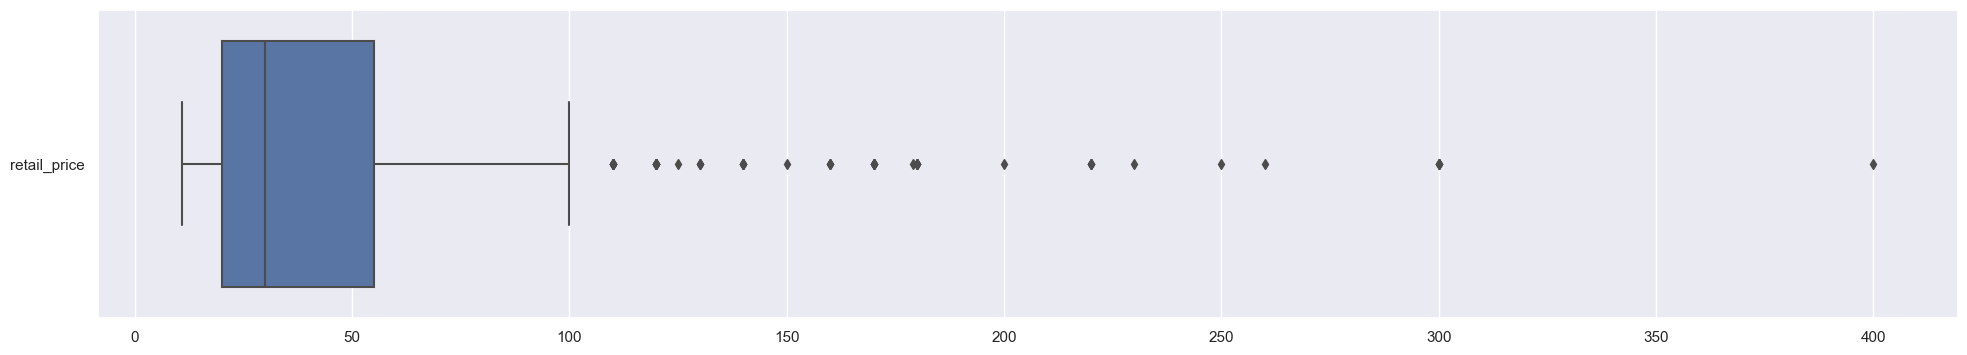

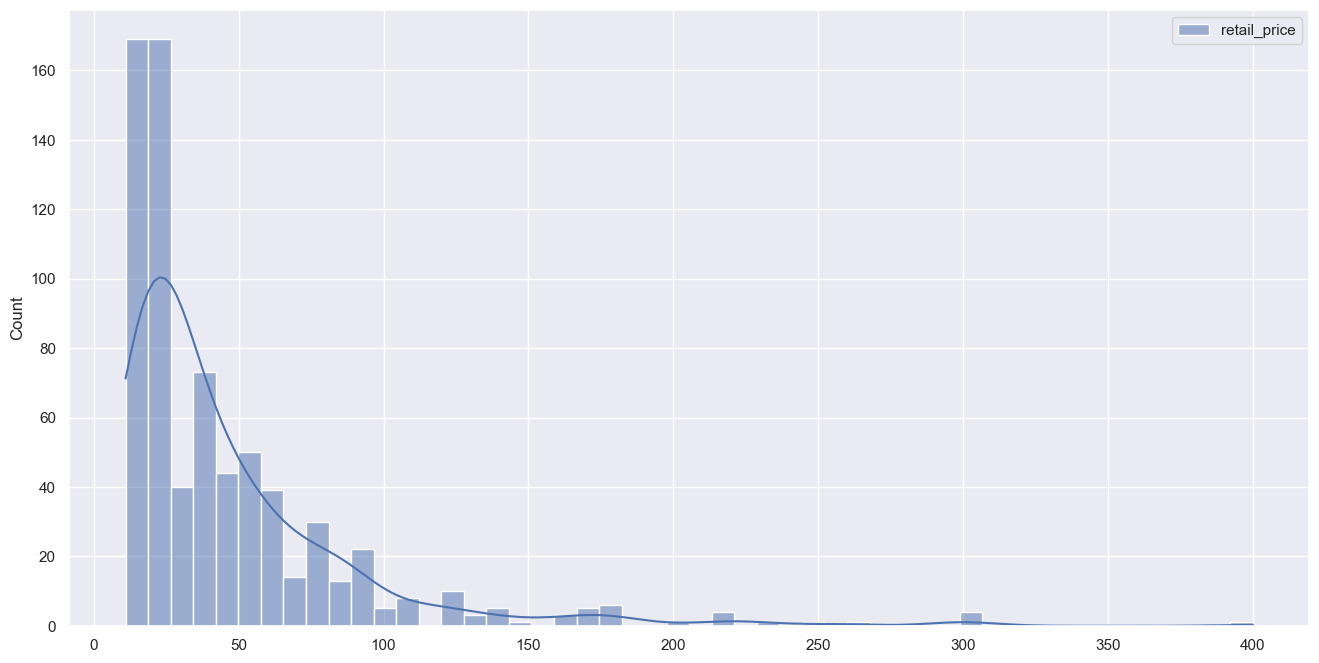

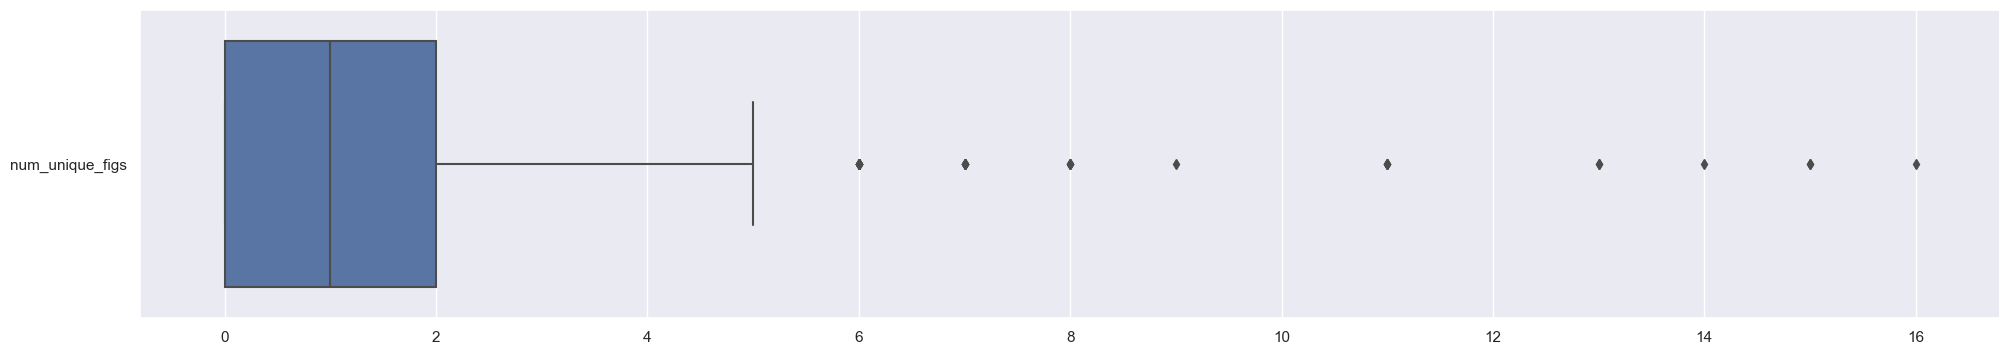

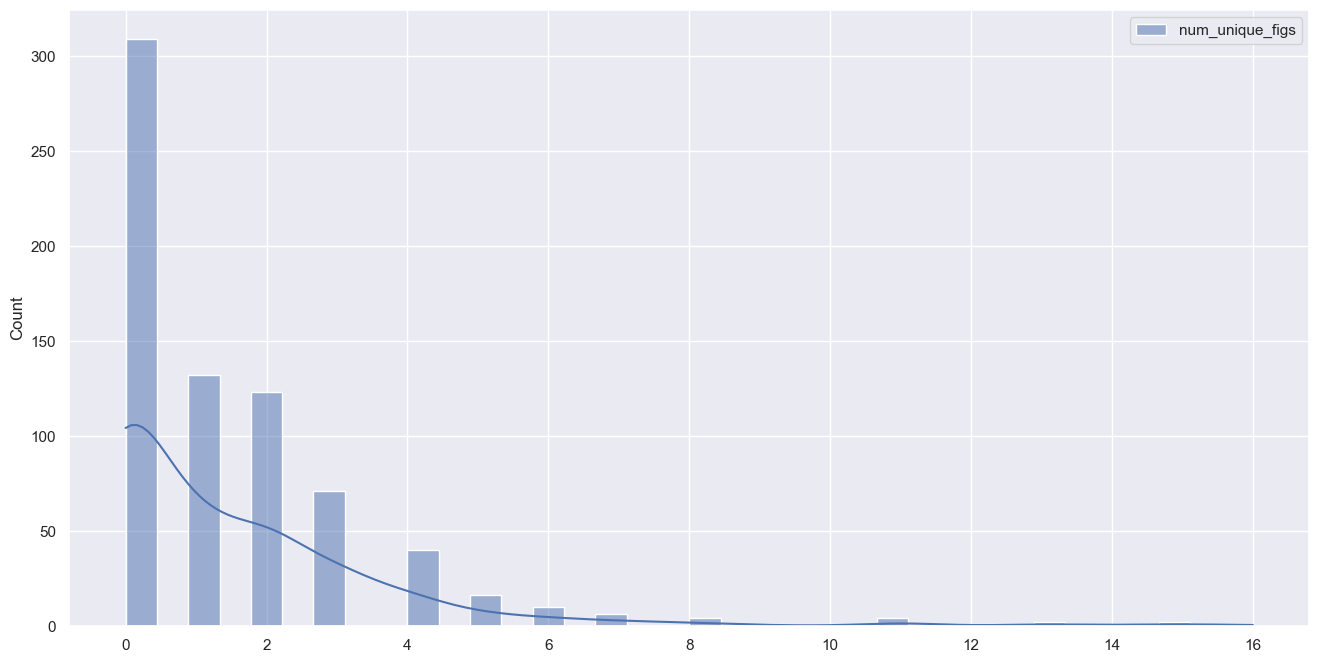

In [14]:
for var in numericalData:
    summary_stats_vis(var)

Function for jointplot against price_change

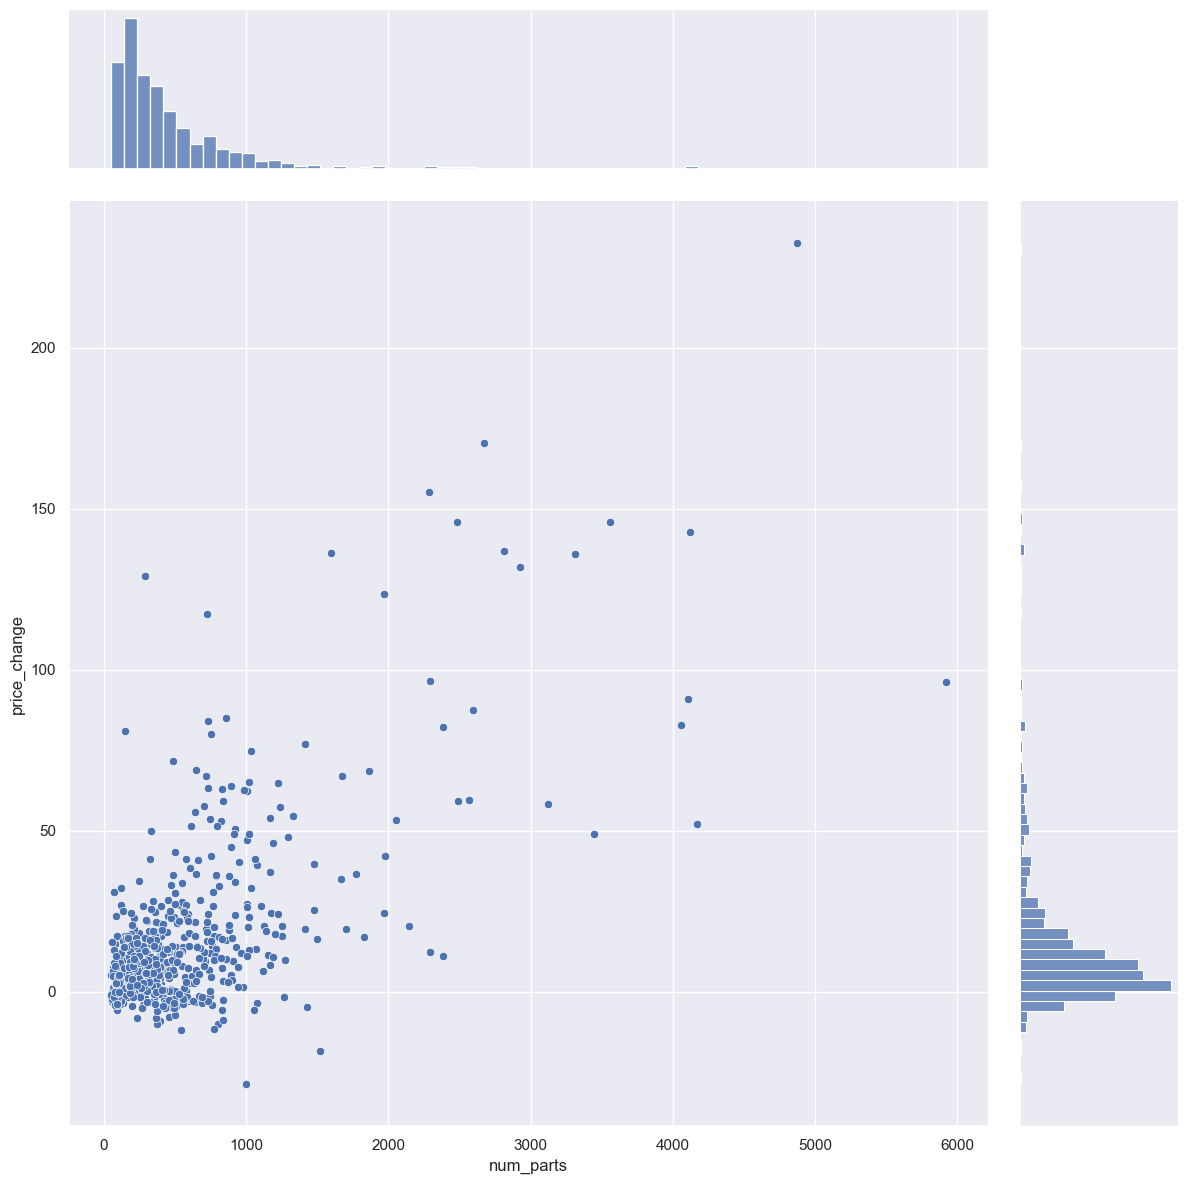

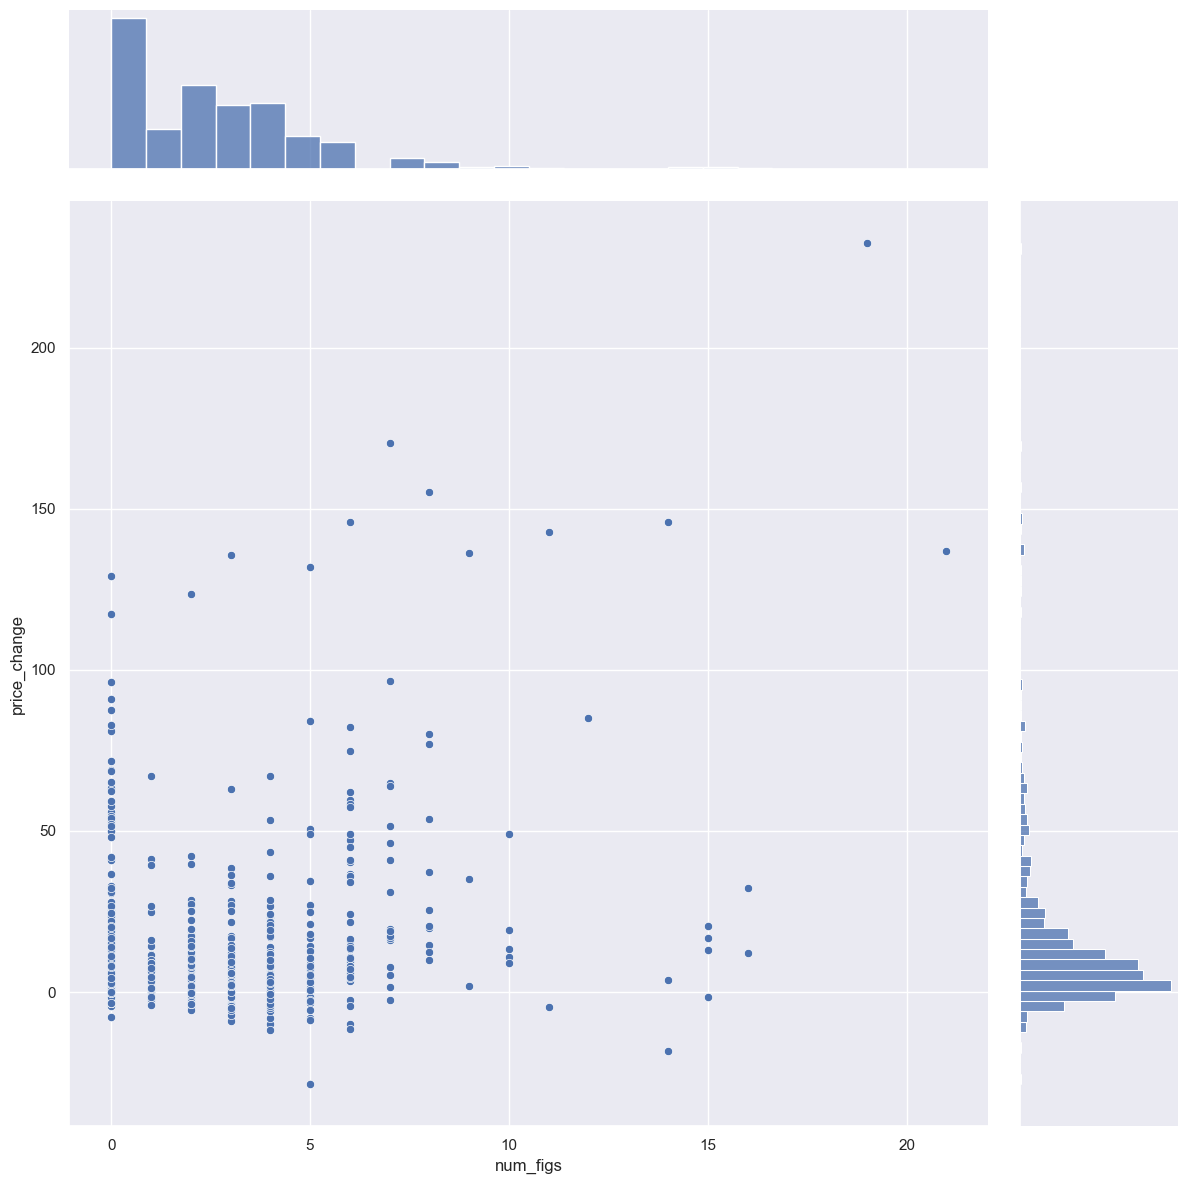

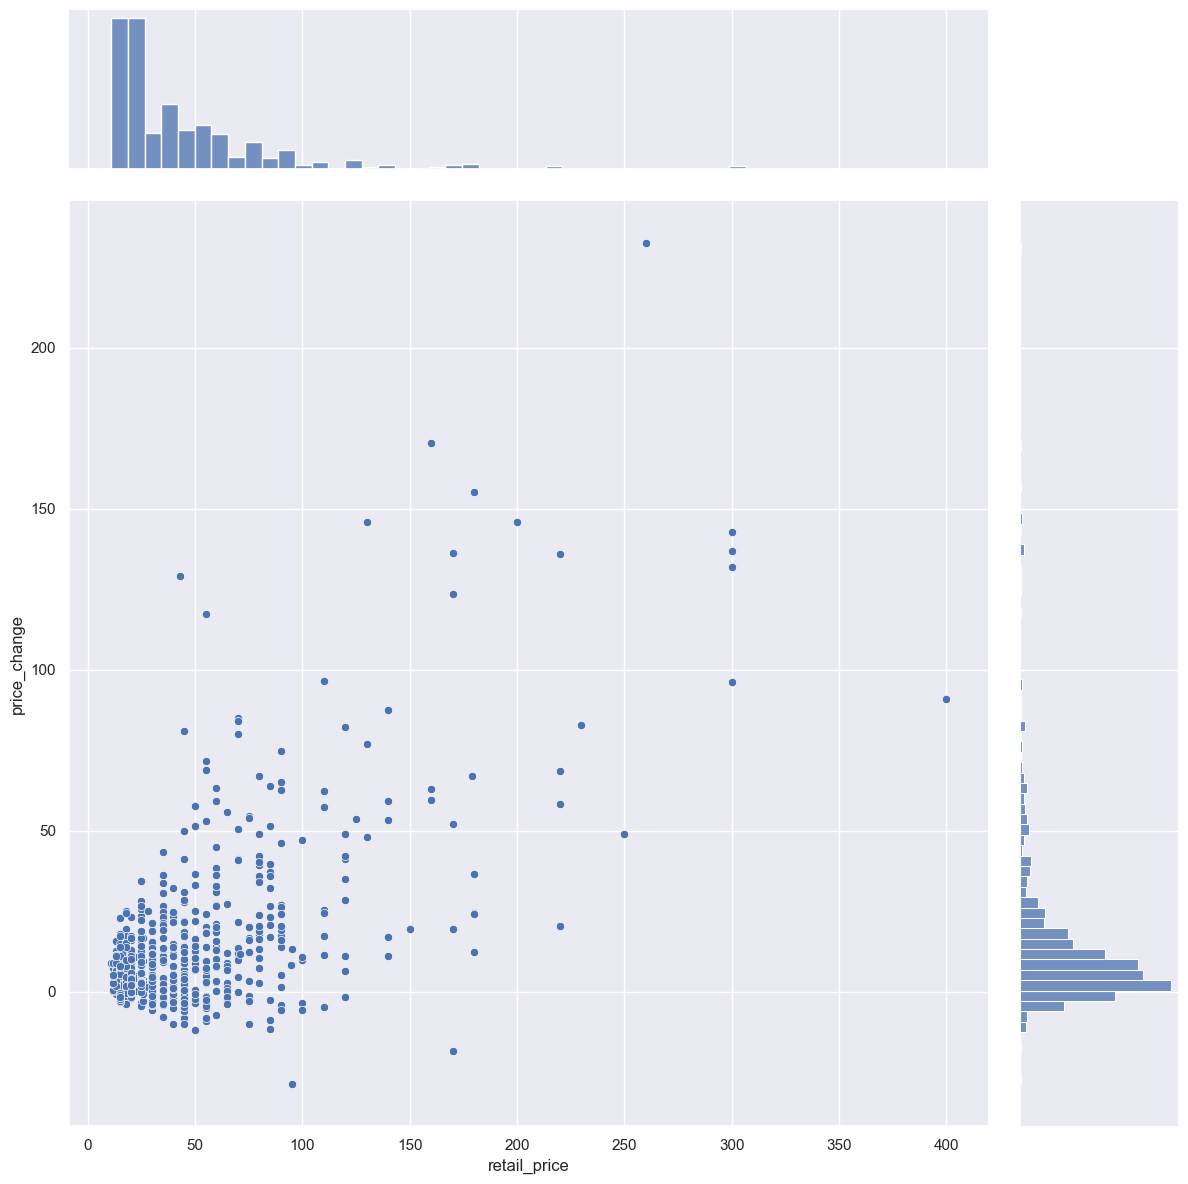

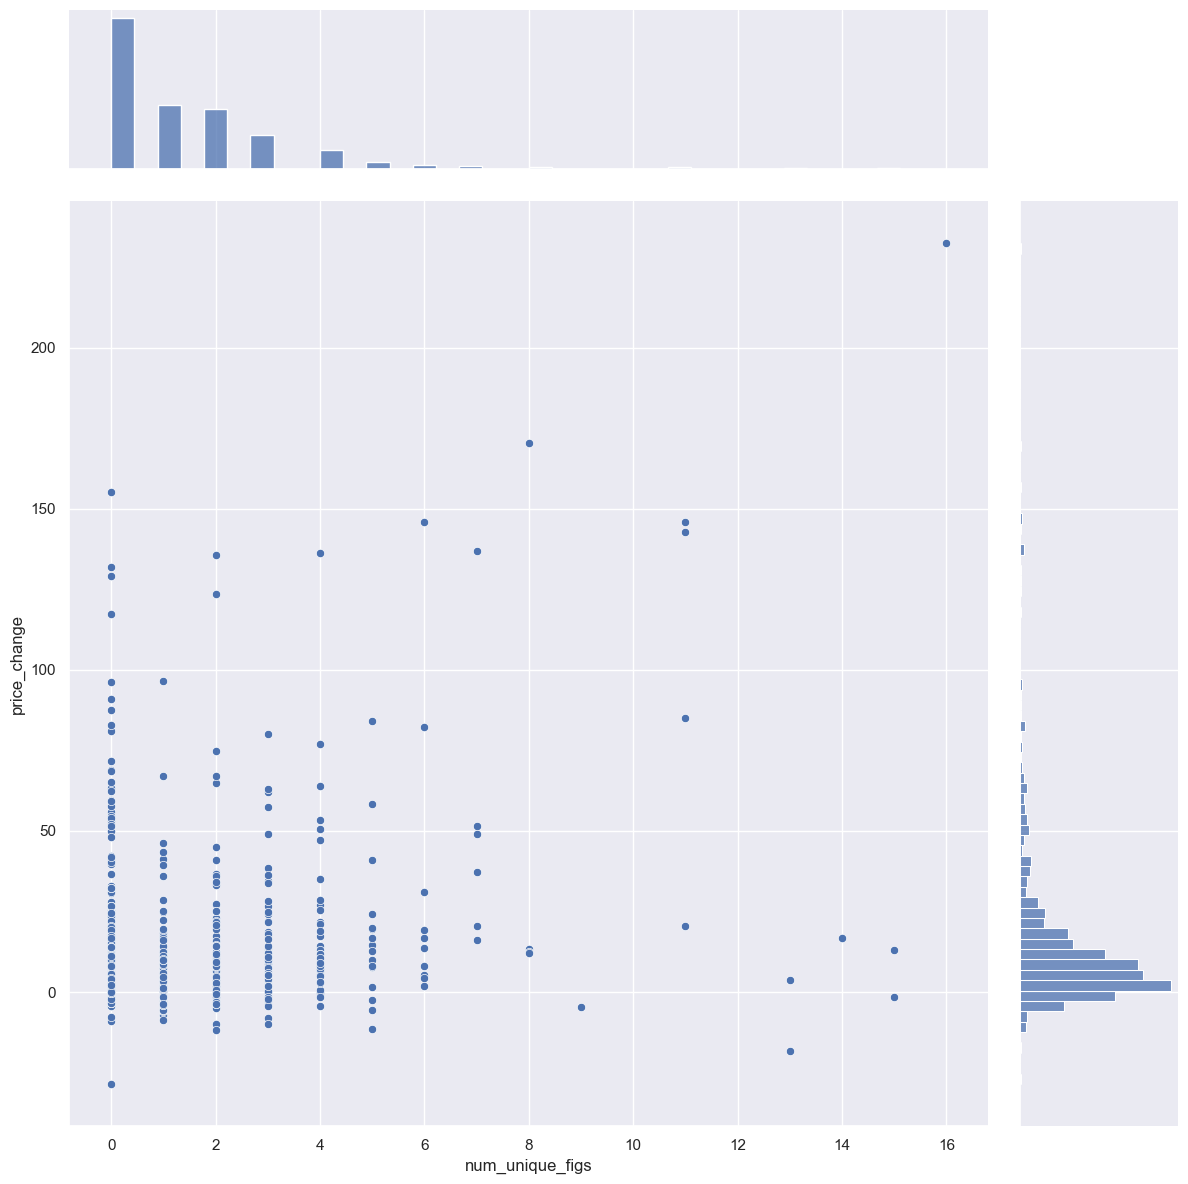

In [15]:
Current_Price = pd.DataFrame(legoData["price_change"])
def jointplot(var):
    var_df = pd.DataFrame(legoData[var])
    jointDF = pd.concat([Current_Price, var_df],axis = 1)
    sb.jointplot(data = jointDF, x = var, y = "price_change", height = 12)

for var in numericalData:
    jointplot(var)

Finding relationship between numerical factors and price_change:
1.num_parts vs price_change
2.num_figs vs price_change
3.retail_price vs price_change
4.num_unique_figs vs price_change

In [16]:
#exploration of categorical data

In [17]:
categoricalData = legoData[['theme_id','Rating','Availability']]
categoricalData

,theme_id,Rating,Availability
0,61,0.0,Retail
1,58,2.3,Retail
2,56,3.8,Retail
3,52,4.0,Retail
4,52,4.1,Retail
...,...,...,...
717,158,3.7,Retail
718,158,3.8,Retail
719,209,3.9,Retail
720,158,3.5,Retail


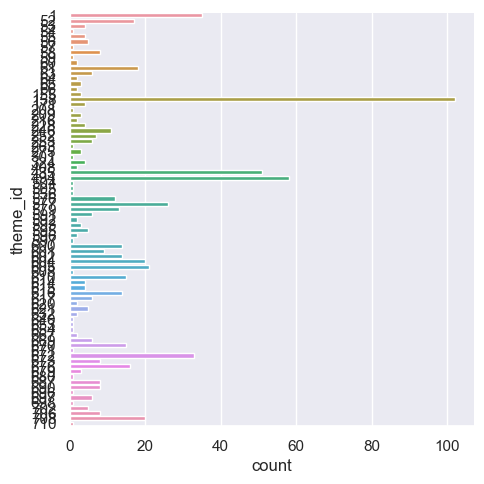

In [18]:
sb.catplot(y = 'theme_id', data = legoData, kind = "count")
#too many categories

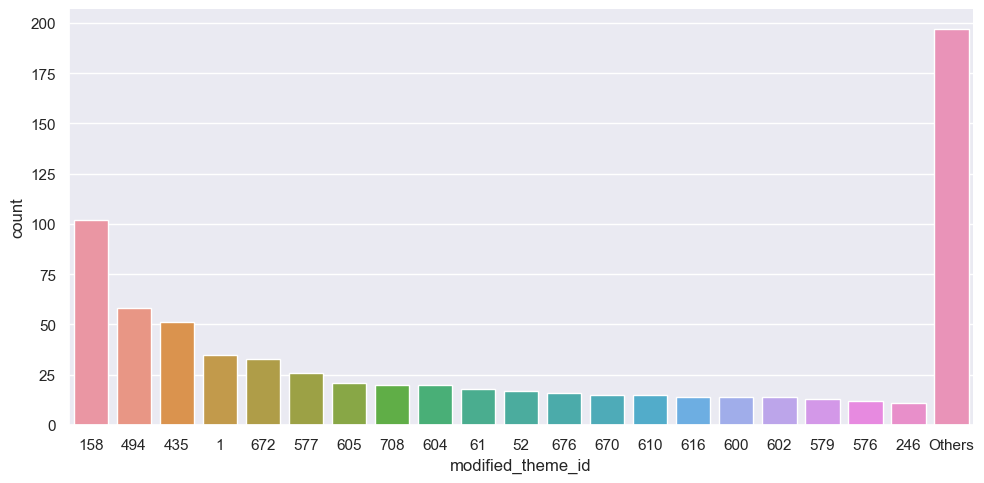

In [19]:
#Too many categories to visualise or perhaps even use, instead we decide to filter out the top 20 most common catergories and treat the rest as a generic others
N = 20
top_n_theme_ids = legoData['theme_id'].value_counts().nlargest(N).index

legoData['modified_theme_id'] = legoData['theme_id'].apply(lambda x: x if x in top_n_theme_ids else 'Others')

sb.catplot(x='modified_theme_id', kind='count', data=legoData, aspect=2, order=top_n_theme_ids.tolist() + ['Others'])


<Axes: xlabel='Rating', ylabel='Count'>

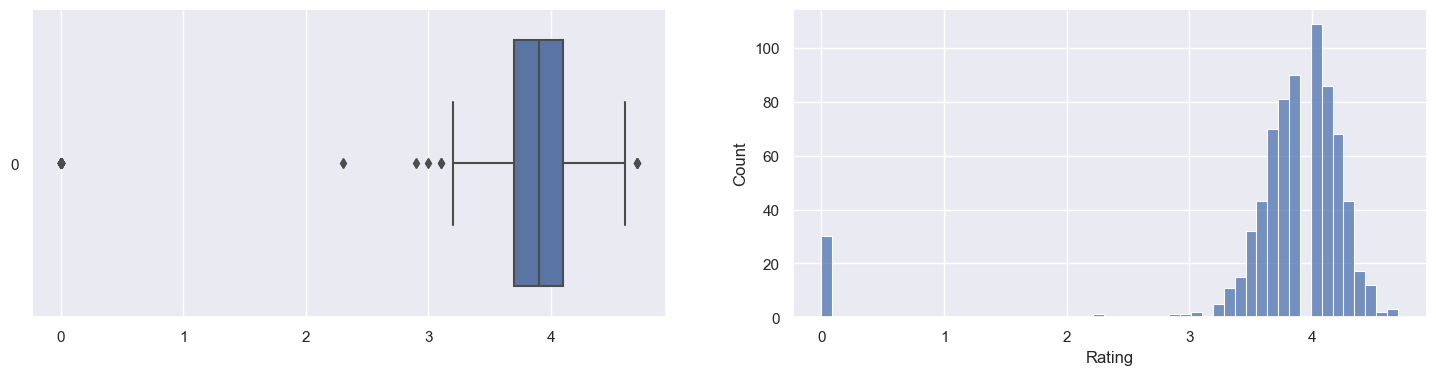

In [20]:
f, axes = plt.subplots(1, 2, figsize=(18, 4))
sb.boxplot(data = legoData['Rating'], orient = "h", ax = axes[0])
sb.histplot(data = legoData['Rating'], ax = axes[1])
#abunance of 0 could be outliers

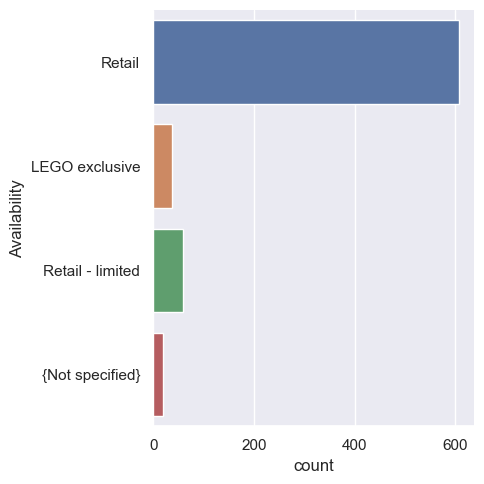

In [21]:
sb.catplot(y = 'Availability', data = legoData, kind = "count")

In [22]:
#Finding relationship between price_change and categorical data

In [23]:
#categorising prices for easier visualisation

In [24]:
price_bins = [0, 50, 100, 150, 200, 250, 300, np.inf]
price_labels = ['0-50', '50-100', '100-150', '150-200', '200-250', '250-300', '300+']

legoData['price_category'] = pd.cut(legoData['price_change'], bins=price_bins, labels=price_labels, right=False)

In [25]:
### Theme ID Vs price change

<Axes: xlabel='modified_theme_id', ylabel='price_change'>

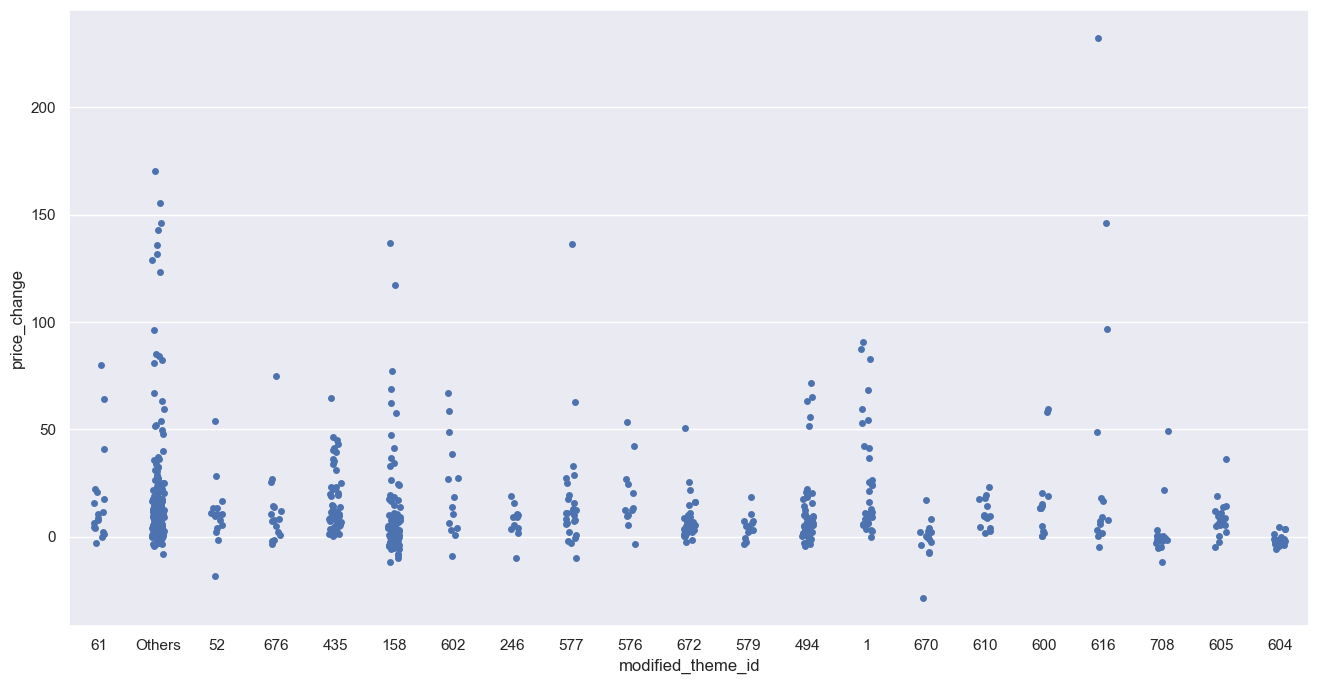

In [26]:
f = plt.figure(figsize=(16, 8))
sb.stripplot(x = 'modified_theme_id', y = 'price_change', data = legoData)

In [27]:
### Set Rating Vs price change

<Axes: xlabel='Rating', ylabel='price_change'>

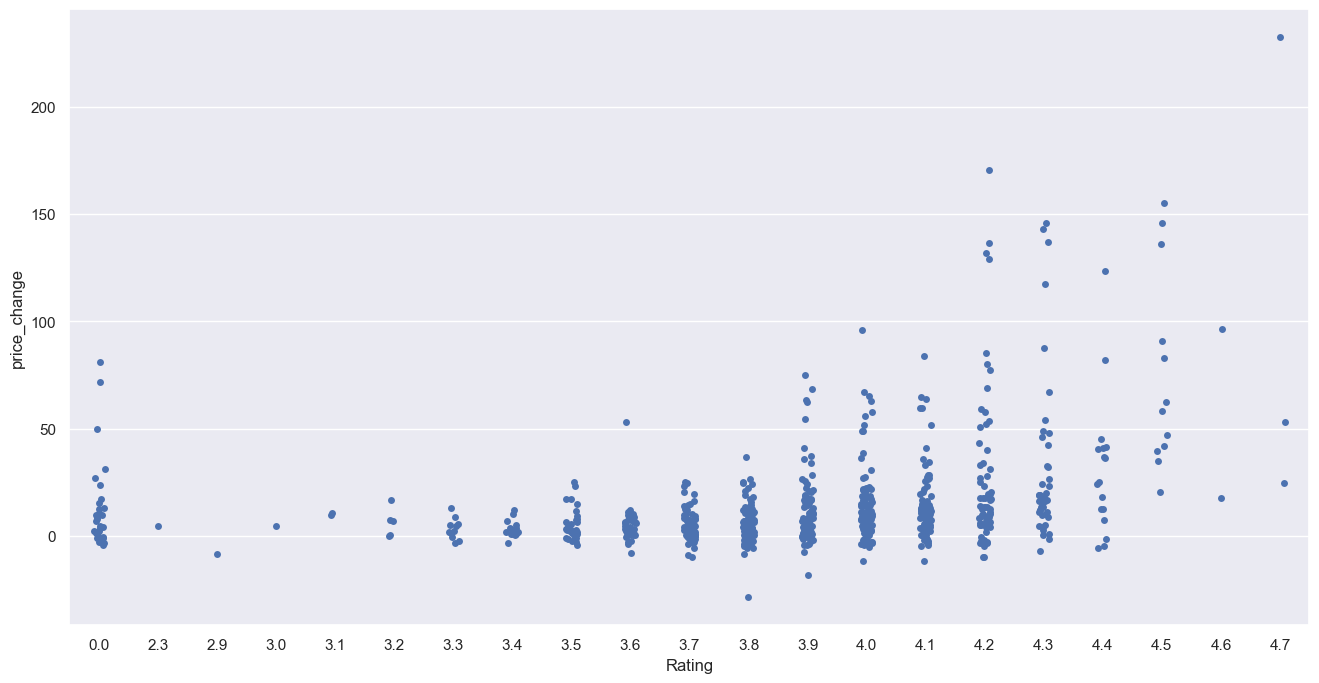

In [28]:
f = plt.figure(figsize=(16, 8))
sb.stripplot(x = 'Rating', y = 'price_change', data = legoData)

In [29]:
### Availability Vs price change

<Axes: xlabel='Availability', ylabel='price_change'>

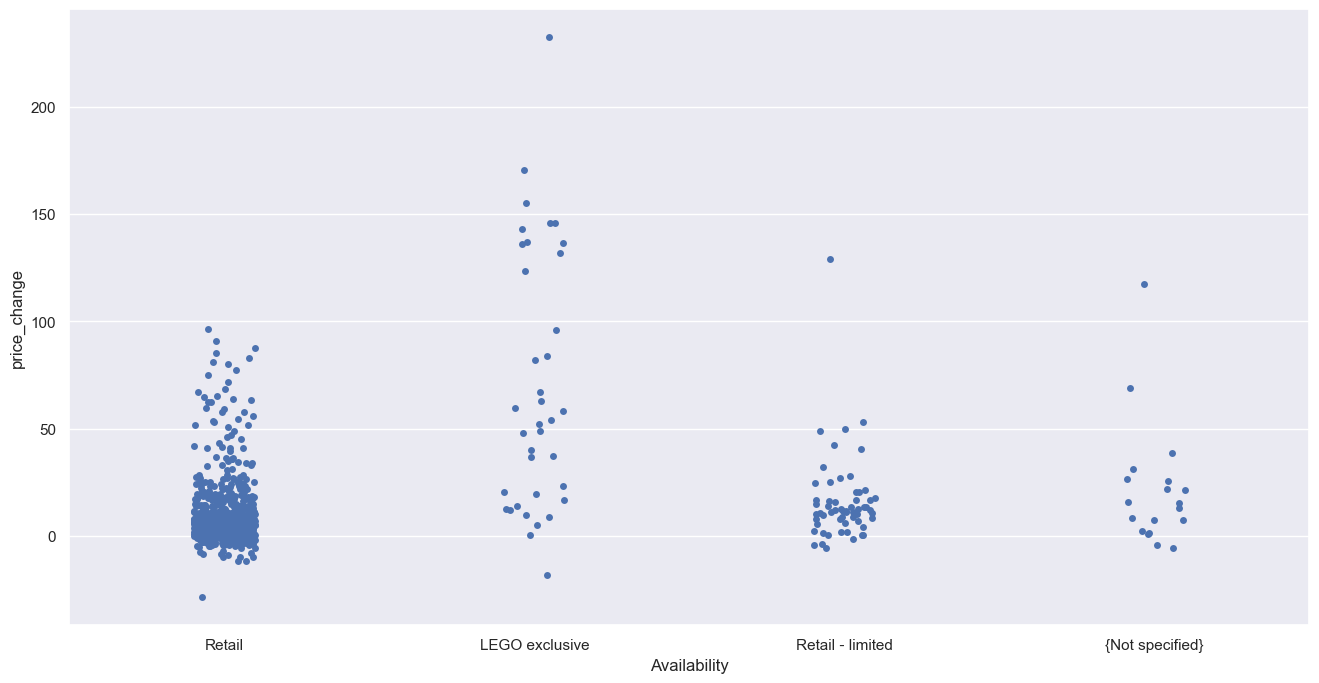

In [30]:
f = plt.figure(figsize=(16, 8))
sb.stripplot(x = 'Availability', y = 'price_change', data = legoData)

<Axes: xlabel='price_category', ylabel='Availability'>

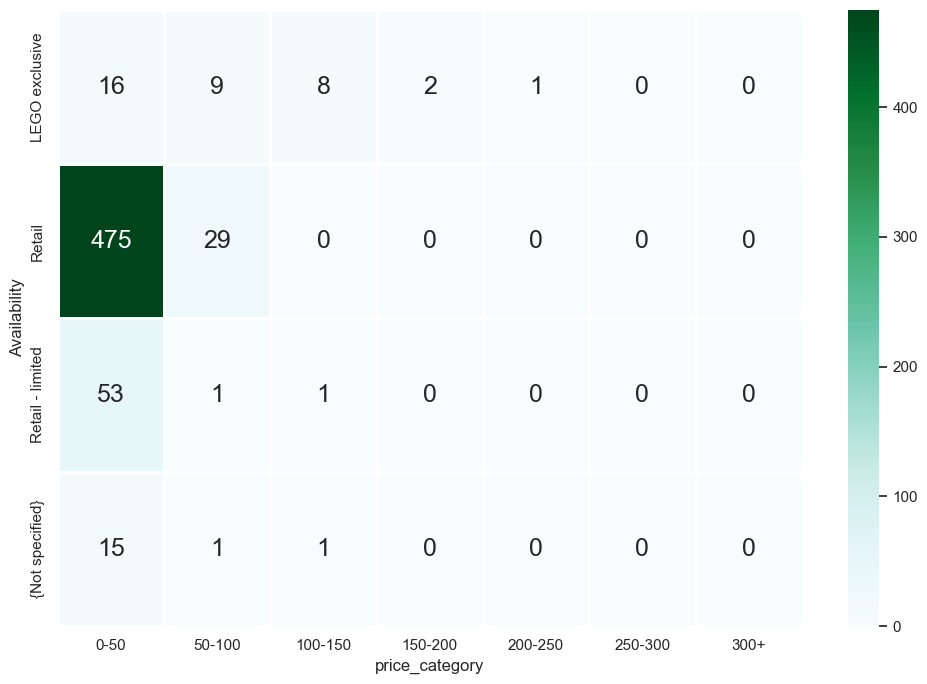

In [31]:
f = plt.figure(figsize=(12, 8))
sb.heatmap(legoData.groupby(['Availability', 'price_category']).size().unstack(),
           linewidths=1, annot=True, fmt='g', annot_kws={"size": 18}, cmap="BuGn")

Model Attempt 1 (Linear Regression)

In [ ]:
#since categorical data cant directly be used in linear regression, we use on hot encoding
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()

# OneHotEncoding of categorical predictors (not the response)
ohe.fit(categoricalData)
categoricalData_ohe = pd.DataFrame(ohe.transform(categoricalData).toarray(), 
                                  columns=ohe.get_feature_names_out(categoricalData.columns))

pricechangedata =  pd.DataFrame(legoData['price_change'])

TotalData_ohe = pd.concat([numericalData, categoricalDatat_ohe], 
                           sort = False, axis = 1).reindex(index=numericalData.index)


Declaration of Functions

In [73]:
# Function to do regression on predictor and response variables
def reg_func(predictor, response):
    # Split the Dataset into Train and Test
    xtrain, xtest, ytrain, ytest = train_test_split(predictor, response, test_size = 0.20)

    # Linear Regression using Train Data
    linreg = LinearRegression()         # create the linear regression object
    linreg.fit(xtrain, ytrain)      # train the linear regression model

    # Coefficients of the Linear Regression line
    print('Intercept of Regression \t: b = ', linreg.intercept_)
    print('Coefficients of Regression \t: a = ', linreg.coef_)

    # Predict price_change values corresponding to predictor
    ytrain_pred = linreg.predict(xtrain)
    ytest_pred = linreg.predict(xtest)

    # Plot the regression line
    f = plt.figure(figsize=(24, 12))
    plt.scatter(ytrain, ytrain_pred, color = "b")
    plt.plot(ytrain, ytrain, 'r-', linewidth = 3) #Ideal

    
# Goodness of fit function using test set
def gof(predictor, response):
    # Split the Dataset into Train and Test
    xtrain, xtest, ytrain, ytest = train_test_split(
        predictor, response, test_size=0.20
    )

    # Linear Regression using Train Data
    linreg = LinearRegression()  # create the linear regression object
    linreg.fit(xtrain, ytrain)  # train the linear regression model

    # Predict price_change
    ytrain_pred = linreg.predict(xtrain)
    ytest_pred = linreg.predict(xtest)

    #Explained Variance (R^2)
    print("Explained Variance (R^2) \t:", linreg.score(xtrain, ytrain))
    
    # MSE function
    def mean_sq_err(actual, predicted):
        """Returns the Mean Squared Error of actual and predicted values"""
        return np.mean(np.square(np.array(actual) - np.array(predicted)))

    mse = mean_sq_err(ytest, ytest_pred)
    print("Mean Squared Error (MSE) \t:", mse)
    print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse))
    
    
def reg_func(TotalData_ohe, pricechangedata)
def gof(TotalData_ohe, pricechangedata)

In [ ]:
Model Attempt 2 (Linear Regression removing outliers)

In [74]:
# Function to find 
def find_outliers(df, col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    print(col)
    print("Lower: ", lower)
    print("Upper: ", upper)

for var in numericalData:
    find_outliers(legoData, var)
find_outliers(legoData, "price_change")

num_parts
Lower:  -426.625
Upper:  1220.375
num_figs
Lower:  -6.0
Upper:  10.0
retail_price
Lower:  -32.510000000000005
Upper:  107.49000000000001
num_unique_figs
Lower:  -3.0
Upper:  5.0
price_change
Lower:  -19.724999999999994
Upper:  38.375


In [ ]:
#removing outliers from numerical predictors and response.

In [75]:


legoData_filtered = legoData[
    (legoData["num_parts"] <= 1220.375) & (legoData["num_parts"] >= -426.625) &
    (legoData["num_figs"] <= 10) & (legoData["num_figs"] >= -6) &
    (legoData["retail_price"] <= 107.49) & (legoData["retail_price"] >= -32.51) &
    (legoData["num_unique_figs"] <= 5) & (legoData["num_unique_figs"] >= -3) &
    (legoData["price_change"] <= 38.375) & (legoData["price_change"] >= -19.725)
]

#add in commen column of set_id to catergorical data for merging with filtered data
commenIndex = pd.DataFrame(legoData["set_id"])
categoricalData_ohe = pd.concat([commenIndex, categoricalData_ohe], axis=1).reindex(index=commenIndex.index)
#merge datasets based on set_id
FilteredNum = pd.DataFrame(legoData_filtered[['num_parts','num_figs','retail_price','num_unique_figs','set_id']])
final_df = FilteredNum.merge(categoricalData_ohe, on='set_id', how='left')
#dropping set_id as it is not a predictor
final_df = final_df.drop('set_id', axis=1)
#extracting filtered price change
FilteredPriceChange = pd.DataFrame(legoData_filtered["price_change"])


def reg_func(final_df, FilteredPriceChange)
def gof(final_df, FilteredPriceChange)

num_parts vs price_change

Intercept of Regression 	: b =  [3.85012708]
Coefficients of Regression 	: a =  [[0.01024069]]


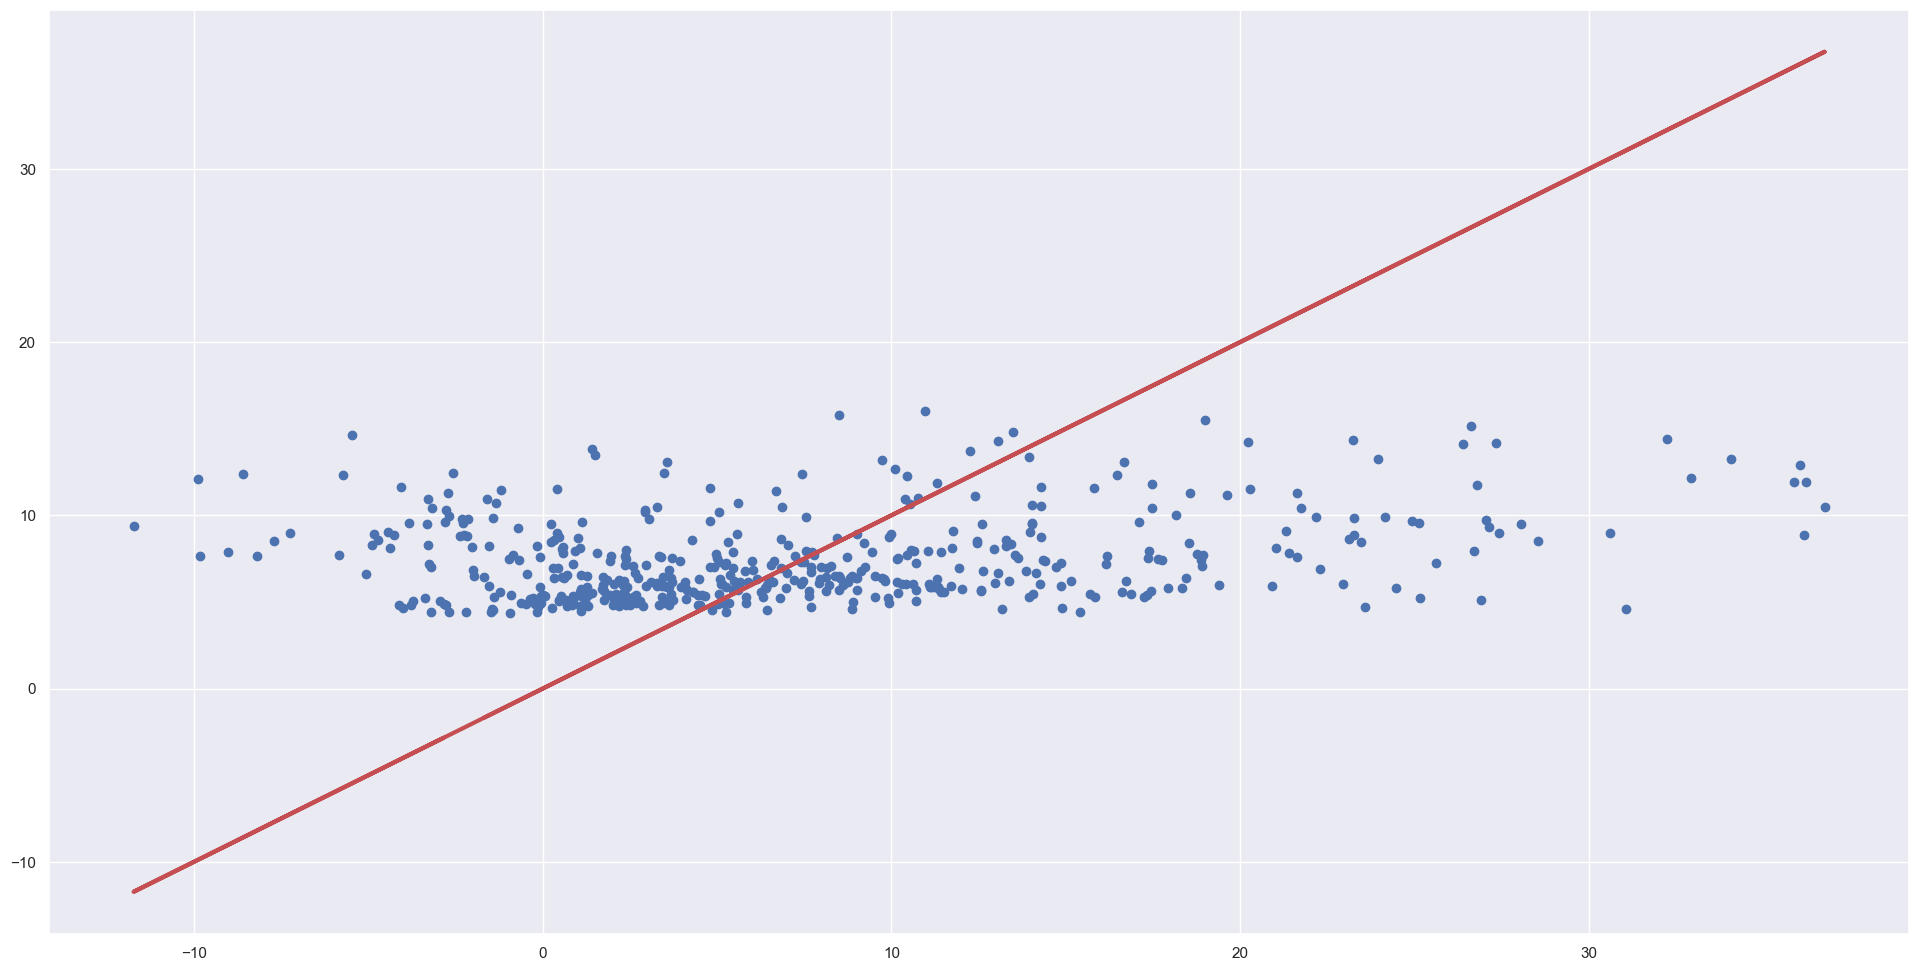

In [76]:
reg_func(clean_num_parts, clean_price_change)

In [77]:
gof(clean_num_parts, clean_price_change)

Explained Variance (R^2) 	: 0.06373562190705406
Mean Squared Error (MSE) 	: 71.65013043276436
Root Mean Squared Error (RMSE) 	: 8.464640006093841


num_figs vs price_change

Intercept of Regression 	: b =  [7.62026975]
Coefficients of Regression 	: a =  [[-0.11715648]]


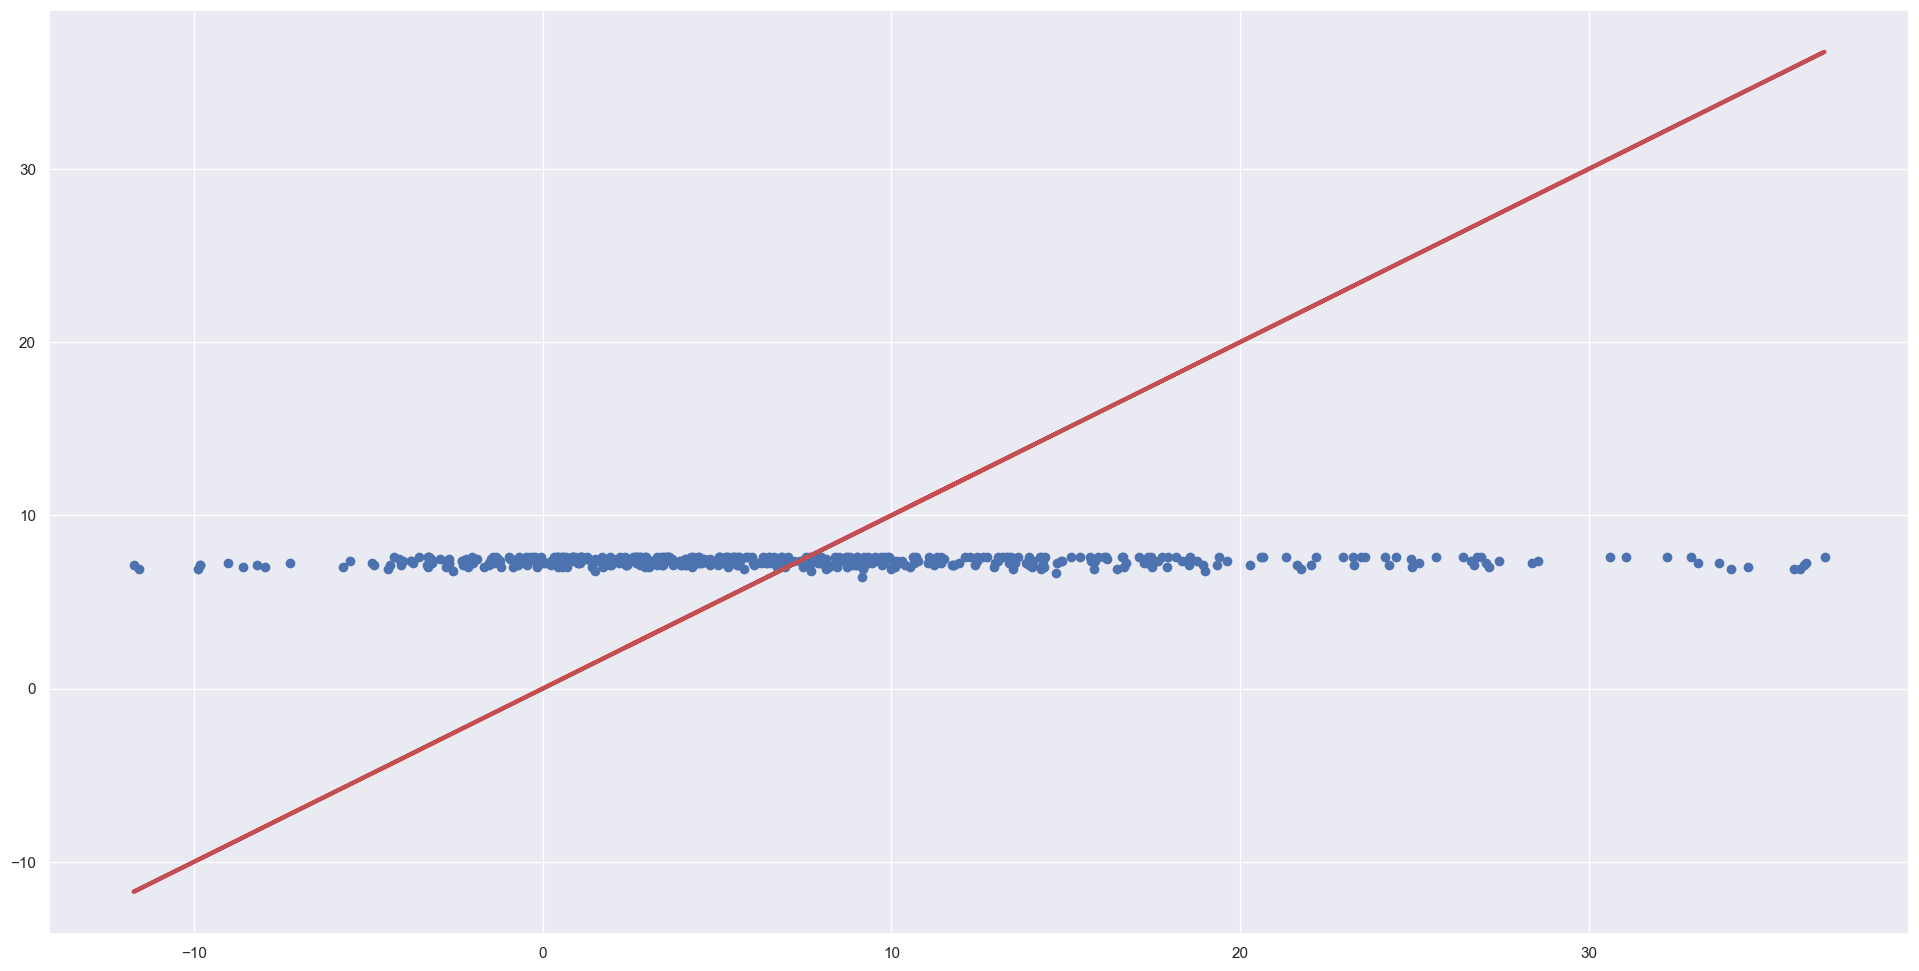

In [78]:
reg_func(clean_num_figs, clean_price_change)

In [79]:
gof(clean_num_figs, clean_price_change)

Explained Variance (R^2) 	: 0.000812080208301591
Mean Squared Error (MSE) 	: 58.00628965189281
Root Mean Squared Error (RMSE) 	: 7.616186030546576


retail_price vs price_change

Intercept of Regression 	: b =  [5.26160498]
Coefficients of Regression 	: a =  [[0.06341432]]


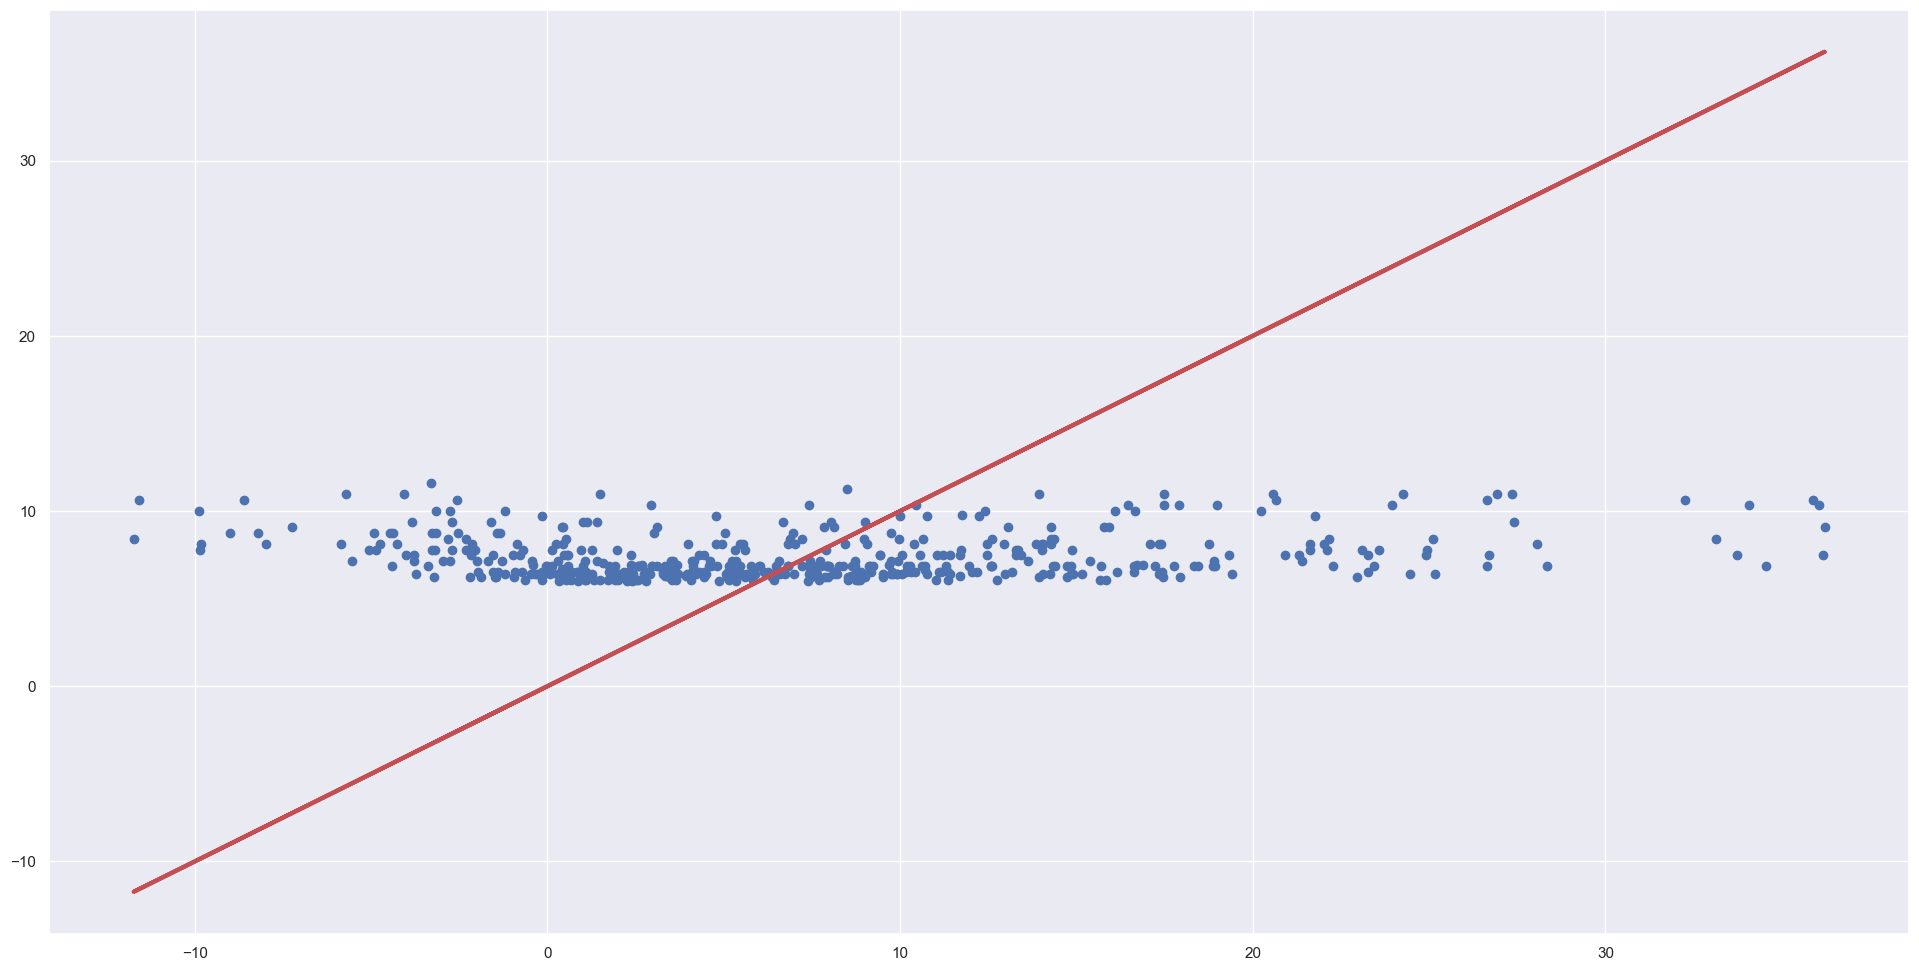

In [80]:
reg_func(clean_retail_price, clean_price_change)

In [81]:
gof(clean_retail_price, clean_price_change)

Explained Variance (R^2) 	: 0.03155550861660539
Mean Squared Error (MSE) 	: 68.90881026854944
Root Mean Squared Error (RMSE) 	: 8.301133071367392


num_unique_figs vs price_change

Intercept of Regression 	: b =  [7.61126579]
Coefficients of Regression 	: a =  [[-0.13374591]]


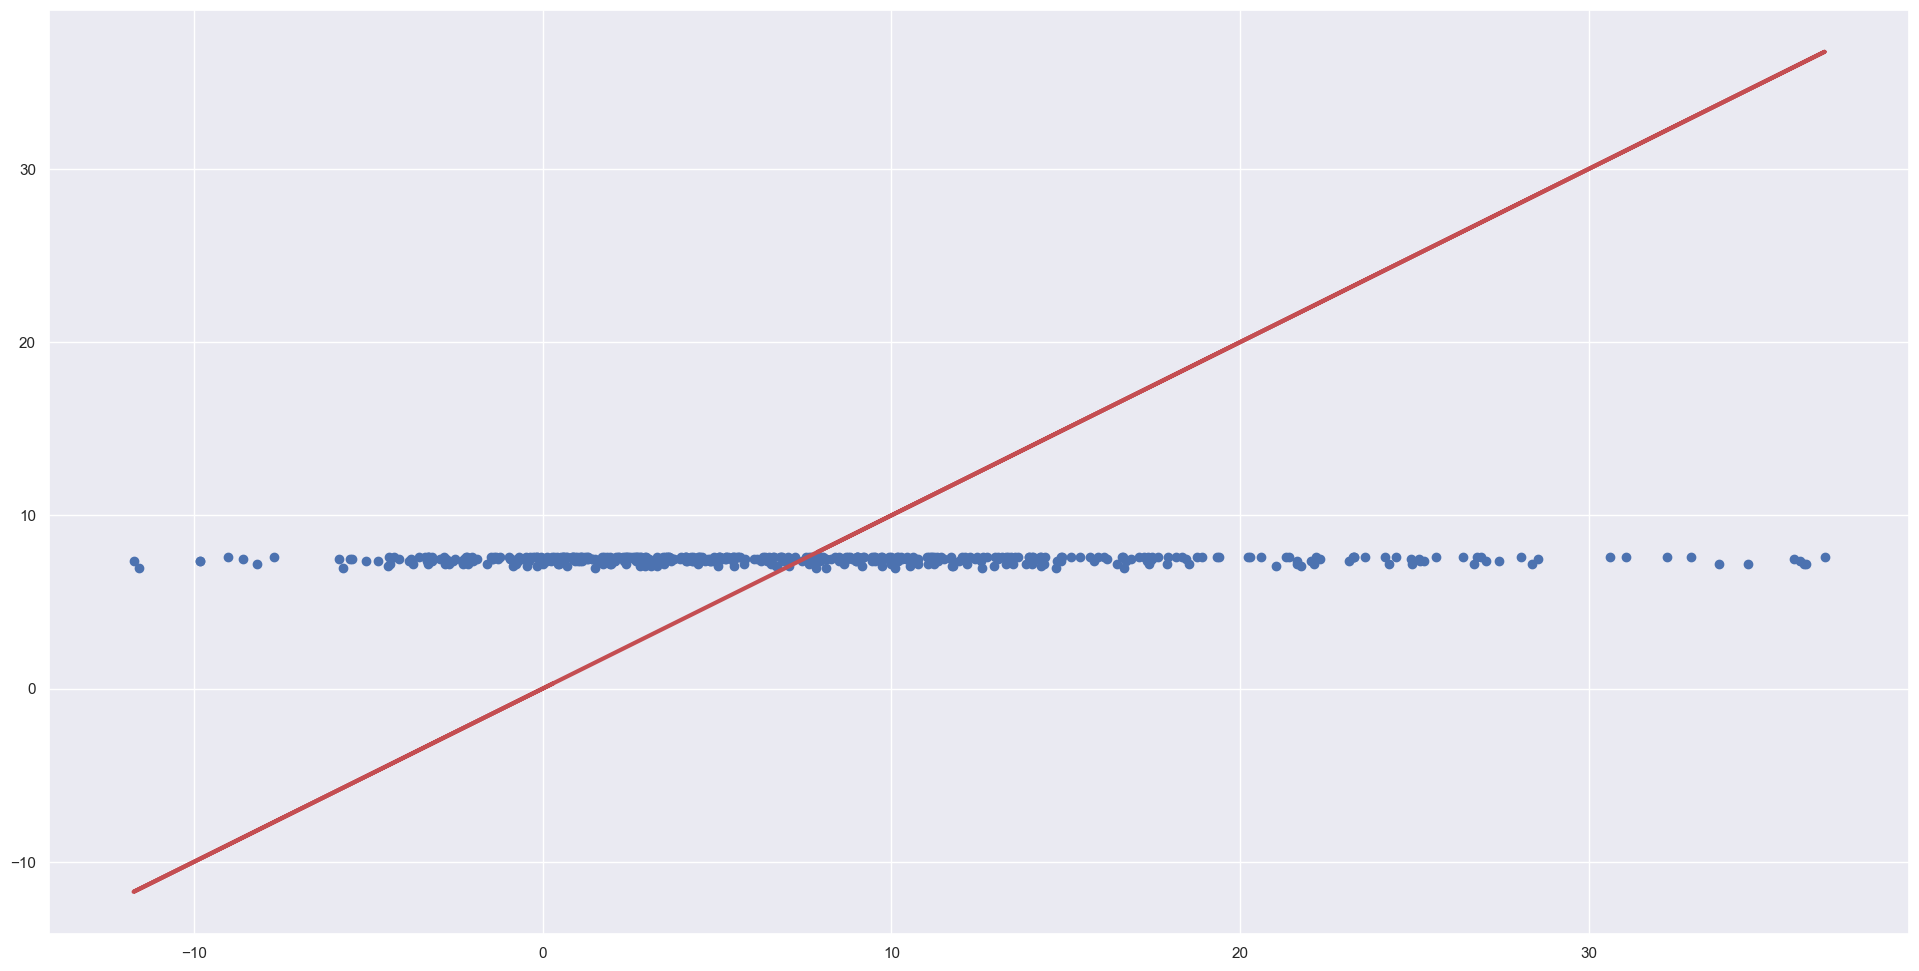

In [41]:
reg_func(clean_num_unique_figs, clean_price_change)

In [42]:
gof(clean_num_unique_figs, clean_price_change)

Explained Variance (R^2) 	: 2.8588100198678745e-05
Mean Squared Error (MSE) 	: 73.17709800441497
Root Mean Squared Error (RMSE) 	: 8.554361344040535


Model Attempt 2 (Ridge Regression Model)

In [43]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

In [64]:
# Function to perform Ridge Regression on predictor and response variables
def ridge_func(predictor, response):
    # Split the Dataset into Train and Test
    xtrain, xtest, ytrain, ytest = train_test_split(predictor, response, test_size = 0.20)
    
    # Create a Ridge regression model
    ridge = Ridge()
    
    # Define a range of alpha values to search
    alphas = np.logspace(-3,3,100)
    
    # Set up GridSearchCV to find the best alpha value using 5-fold cross-validation
    grid_search = GridSearchCV(estimator=ridge, param_grid={'alpha': alphas}, scoring='neg_mean_squared_error', cv=5)
    
    # Perform Grid Search
    grid_search.fit(xtrain, ytrain)
    
    # Get the best alpha value and corresponding model
    best_alpha = grid_search.best_params_['alpha']
    best_ridge = grid_search.best_estimator_
    
    # Evaluate the model on the test set
    ypred = best_ridge.predict(xtest)
    mse = mean_squared_error(ytest, ypred)
    print("Mean Squared Error on Test Set:", mse)
    print("Best alpha:", best_alpha)
    
    # Plot cross-validated mean squared error for different alpha values
    cv_results = grid_search.cv_results_
    plt.figure(figsize=(10, 5))
    plt.semilogx(alphas, -cv_results['mean_test_score'], label='Mean CV MSE')
    plt.xlabel('Alpha')
    plt.ylabel('Mean Squared Error')
    plt.title('Cross-Validated Mean Squared Error vs. Alpha')
    plt.axvline(x=best_alpha, color='r', linestyle='--', label='Best Alpha')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    # Plot the actual vs. predicted values
    plt.figure(figsize=(8, 6))
    plt.scatter(ytest, ypred, color='blue', label='Actual vs. Predicted')
    plt.plot([ytest.min(), ytest.max()], [ytest.min(), ytest.max()], 'k--', lw=2, color='red', label='Ideal Prediction')

num_parts vs price_change

Mean Squared Error on Test Set: 62.07392076189284
Best alpha: 1000.0


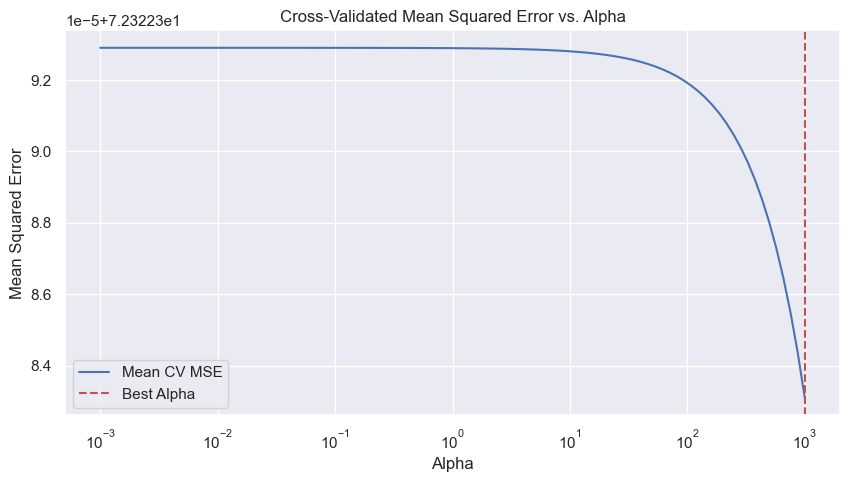

C:\Users\Jun Howe\AppData\Local\Temp\ipykernel_13360\2578527251.py:43: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([ytest.min(), ytest.max()], [ytest.min(), ytest.max()], 'k--', lw=2, color='red', label='Ideal Prediction')


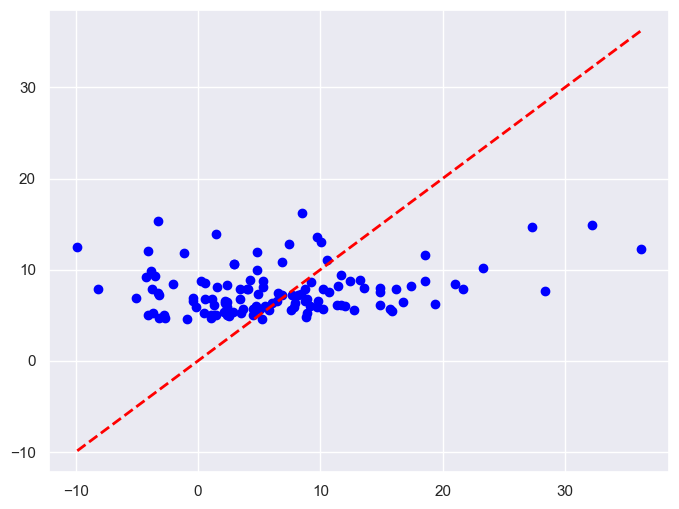

In [65]:
ridge_func(clean_num_parts, clean_price_change)

num_figs vs price_change

Mean Squared Error on Test Set: 69.8816698070983
Best alpha: 497.7023564332114


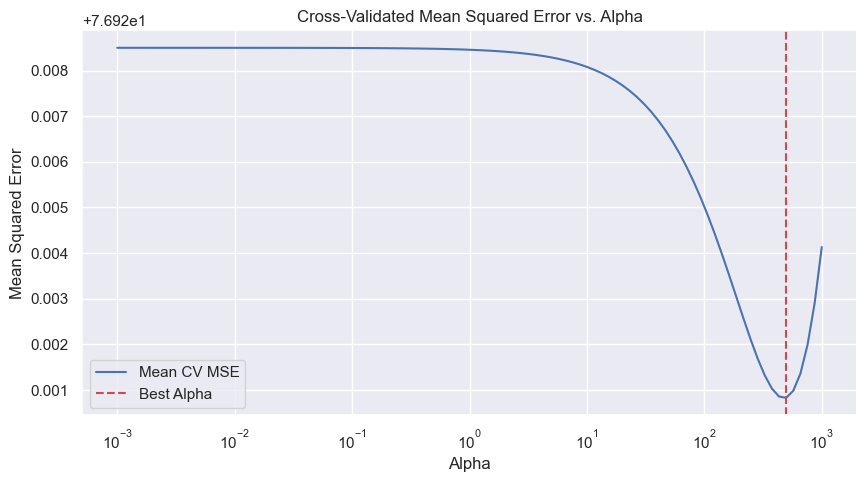

C:\Users\Jun Howe\AppData\Local\Temp\ipykernel_13360\2578527251.py:43: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([ytest.min(), ytest.max()], [ytest.min(), ytest.max()], 'k--', lw=2, color='red', label='Ideal Prediction')


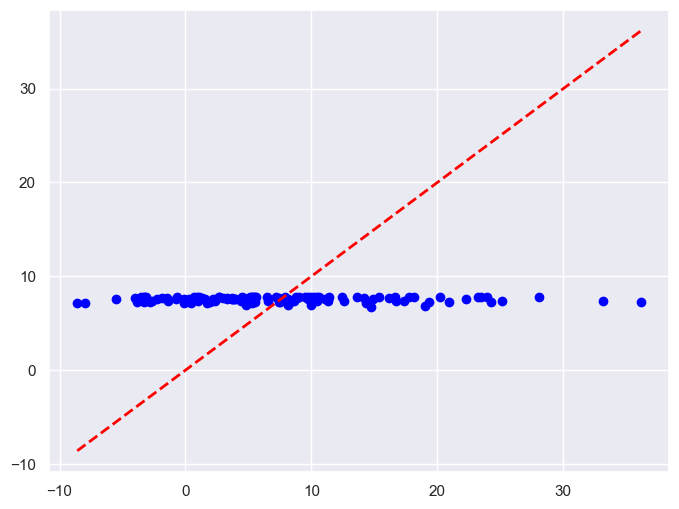

In [82]:
ridge_func(clean_num_figs, clean_price_change)

retail_price vs price_change

Mean Squared Error on Test Set: 75.78474389272843
Best alpha: 1000.0


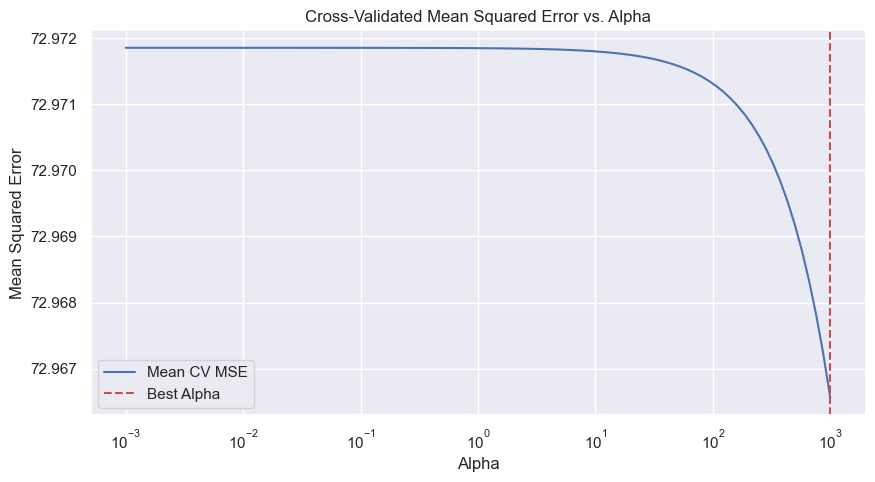

C:\Users\Jun Howe\AppData\Local\Temp\ipykernel_13360\2578527251.py:43: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([ytest.min(), ytest.max()], [ytest.min(), ytest.max()], 'k--', lw=2, color='red', label='Ideal Prediction')


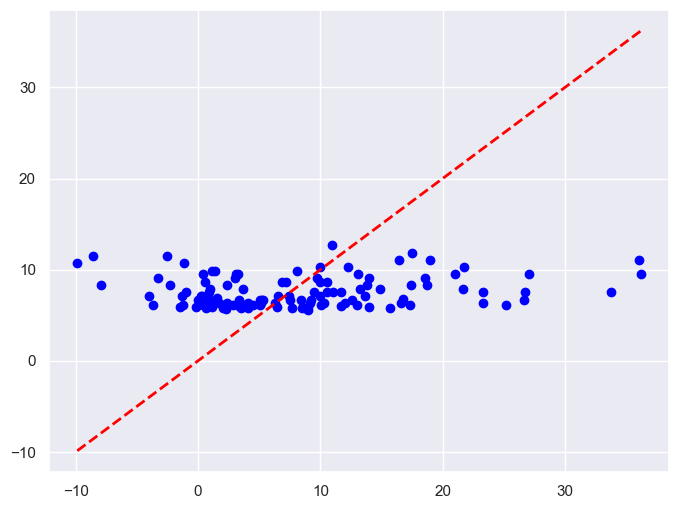

In [83]:
ridge_func(clean_retail_price, clean_price_change)

num_unique_figs vs price_change

Mean Squared Error on Test Set: 87.28267556300865
Best alpha: 1000.0


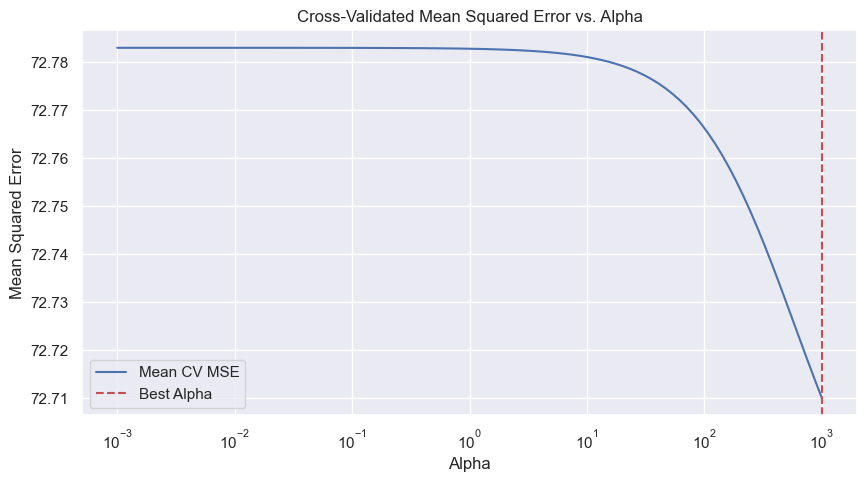

C:\Users\Jun Howe\AppData\Local\Temp\ipykernel_13360\2578527251.py:43: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([ytest.min(), ytest.max()], [ytest.min(), ytest.max()], 'k--', lw=2, color='red', label='Ideal Prediction')


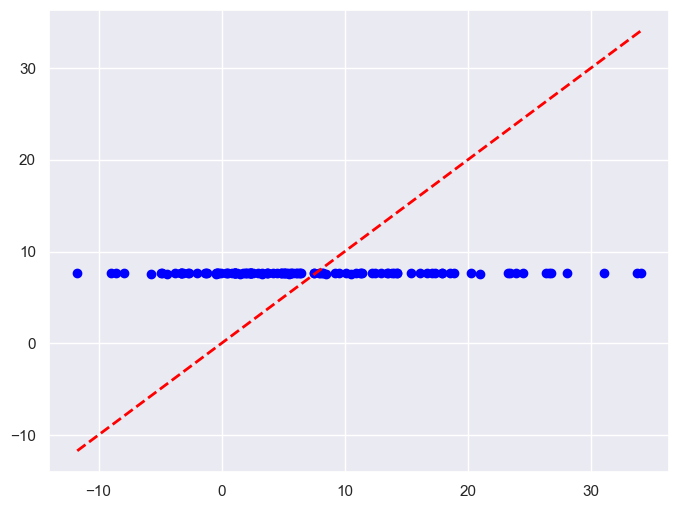

In [84]:
ridge_func(clean_num_unique_figs, clean_price_change)